# Машинное обучение, ВМК МГУ

## Практическое задание 3. Метод опорных векторов и логистическая регрессия

### Общая информация

Дата выдачи: 31 октября 2023 23:59

Мягкий дедлайн: 23:59 MSK 14 ноября 2023 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 21 ноября 2023.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — **10 баллов + 4.8 бонусов**.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. **Не нужно** удалять и видоизменять написанный код и текст, если явно не указана такая возможность. Создавать новые ячейки с кодом/текстов там, где это осмысленно и вы считаете необходимым, конечно, можно. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде/как результат вывода ячейки. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 баллов за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

In [19]:
%pylab inline
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/HW3/.venv/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [ ]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Выведите  количество коэффициентов (веса, они же составляют вектор w) близких к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа **ненулевых коэффициентов от коэффицента регуляризации** (перебирайте значения по _логарифмической сетке_ от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

**Замечания:**
* Используйте модели из sklearn
* Можно строить графики с учетом $w_0$ (bias), можно без **(обязательно поясните, как в итоге строили),**  однако стоит учитывать, что $w_0 \approx 0$ несет другой смысл, нежели чем $w_i \approx 0$.
* Перебор по логарифмической сетке от $10^{-3}$ до $10^{3}$ подразумевает **равномерный перебор по степеням:** $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ итд. Однако ничего не мешает (и не будет лишним) сделать и более частую равномерную сетку, если позволяет время вычислений. Менее частую сетку лучше делать в тех случаях, когда вычисления совсем запредельные по времени, однако помните, что делание выводов о какой-либо зависимости по 3-4 точкам может привести к ошибочным результатам **(и такое будет засчитываться как ошибка, если не пояснено, почему нельзя было сделать больше точек)**

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

np.random.seed(666)  # супер адский сатана

logsp = np.logspace(-3, 3, num=10)  # строим общий логспейс
ridge_coefs = []
ridge_predictions = []
lasso_coefs = []
lasso_predictions = []

In [ ]:
# построим стандартный Ridge регрессию с параметрами по умолчанию
model = Ridge()
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)

# посмотрим на функцию риска на тесте
test_result = mean_squared_error(y_prediction, y_test)
print(f'MSE на тесте составляет: {test_result}', end="\n\n")

# посмотрим на коэффициенты w
print(f'Число параметров: {model.coef_.shape[0]}')
print(f'Минимальный по модулю коэффициент w_i: {np.min(np.abs(model.coef_))}')
print(f'Коэффициент w_0: {model.intercept_}', end='\n\n')

print(f'Минимальные три коэффициента: {[*np.sort(np.abs(model.coef_))[:3]]}')

ridge_coefs.append(np.sort(np.abs(model.coef_)))
ridge_predictions.append(y_prediction)

MSE на тесте составляет: 3399.3908287301742

Число параметров: 10
Минимальный по модулю коэффициент w_i: 2.1699473689401305
Коэффициент w_0: 152.15751264654267

Минимальные три коэффициента: [2.1699473689401305, 20.865880994691967, 33.31087206598365]


In [ ]:
# теперь пробежим так по логарифмической сетке для параметра alpha из коэффициента регуляризации
for alpha in logsp:
    alpha_model = Ridge(alpha=alpha)
    alpha_model.fit(X_train, y_train)
    y_prediction = alpha_model.predict(X_test)

    # сохраним значения коэффициентов и сами модели для дальнейшей оценки их качества
    ridge_coefs.append(np.sort(np.abs(alpha_model.coef_)))
    ridge_predictions.append(y_prediction)

    print(
        f'Ошибка MSE при alpha={alpha:.3f}: {mean_squared_error(y_prediction, y_test):.3f}')

Ошибка MSE при alpha=0.001: 3120.066
Ошибка MSE при alpha=0.005: 3110.870
Ошибка MSE при alpha=0.022: 3103.930
Ошибка MSE при alpha=0.100: 3096.006
Ошибка MSE при alpha=0.464: 3202.913
Ошибка MSE при alpha=2.154: 3722.295
Ошибка MSE при alpha=10.000: 4577.480
Ошибка MSE при alpha=46.416: 5103.776
Ошибка MSE при alpha=215.443: 5263.094
Ошибка MSE при alpha=1000.000: 5300.382


In [ ]:
# провернем то же самое, но теперь уже с Lasso регрессией

# стандартное Lasso
model = Lasso()
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)

# посмотрим на функцию риска на тесте
test_result = mean_squared_error(y_prediction, y_test)
print(f'MSE на тесте составляет: {test_result}', end="\n\n")

# посмотрим на коэффициенты w
print(f'Число параметров: {model.coef_.shape[0]}')
print(f'Минимальный по модулю коэффициент w_i: {np.min(np.abs(model.coef_))}')
print(f'Коэффициент w_0: {model.intercept_}', end='\n\n')

print(f'Минимальные 8 коэффициентов: {[*np.sort(np.abs(model.coef_))[:8]]}')

lasso_coefs.append(np.sort(np.abs(model.coef_)))
lasso_predictions.append(y_prediction)

MSE на тесте составляет: 3429.744240808199

Число параметров: 10
Минимальный по модулю коэффициент w_i: 0.0
Коэффициент w_0: 152.05468018239867

Минимальные 8 коэффициентов: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 48.57203696256319]


In [ ]:
for alpha in logsp:
    alpha_model = Lasso(alpha=alpha)
    alpha_model.fit(X_train, y_train)
    y_prediction = alpha_model.predict(X_test)

    # сохраним значения коэффициентов и сами модели для дальнейшей оценки их качества
    lasso_coefs.append(np.sort(np.abs(alpha_model.coef_)))
    lasso_predictions.append(y_prediction)

    print(
        f'Ошибка MSE при alpha={alpha:.3f}: {mean_squared_error(y_prediction, y_test):.3f}')

Ошибка MSE при alpha=0.001: 3122.306
Ошибка MSE при alpha=0.005: 3109.965
Ошибка MSE при alpha=0.022: 3097.669
Ошибка MSE при alpha=0.100: 3061.406
Ошибка MSE при alpha=0.464: 3085.726
Ошибка MSE при alpha=2.154: 5151.709
Ошибка MSE при alpha=10.000: 5310.821
Ошибка MSE при alpha=46.416: 5310.821
Ошибка MSE при alpha=215.443: 5310.821
Ошибка MSE при alpha=1000.000: 5310.821


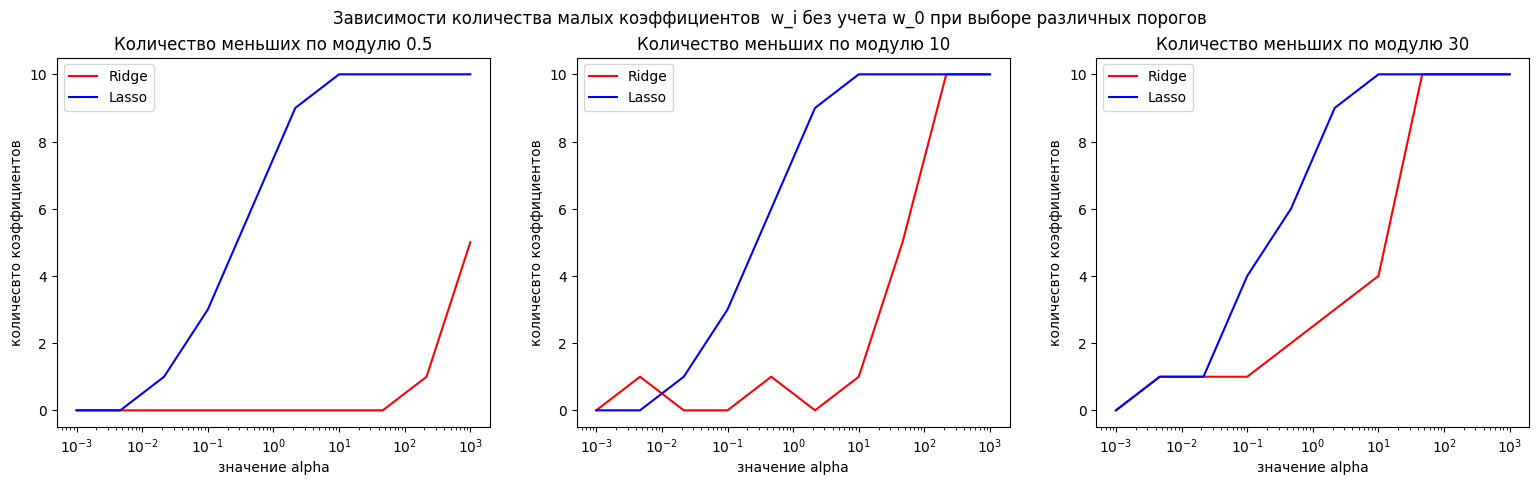

In [ ]:
# построим граффик зависимости малых коэффициентов от параметра alpha
figure, axis = plt.subplots(1, 3)
figure.suptitle(
    'Зависимости количества малых коэффициентов  w_i без учета w_0 при выборе различных порогов')
figure.set_figwidth(19)

axis[0].set_xscale('log')
axis[0].set_title('Количество меньших по модулю 0.5')
axis[0].plot(logsp, np.sum(np.array(ridge_coefs[1:])
             < 0.5, axis=1), c='r', label='Ridge')
axis[0].plot(logsp, np.sum(np.array(lasso_coefs[1:])
             < 0.5, axis=1), c='b', label='Lasso')
axis[0].legend()

axis[1].set_xscale('log')
axis[1].set_title('Количество меньших по модулю 10')
axis[1].plot(logsp, np.sum(np.array(ridge_coefs[1:])
             < 10, axis=1), c='r', label='Ridge')
axis[1].plot(logsp, np.sum(np.array(lasso_coefs[1:])
             < 10, axis=1), c='b', label='Lasso')
axis[1].legend()

axis[2].set_xscale('log')
axis[2].set_title('Количество меньших по модулю 30')
axis[2].plot(logsp, np.sum(np.array(ridge_coefs[1:])
             < 30, axis=1), c='r', label='Ridge')
axis[2].plot(logsp, np.sum(np.array(lasso_coefs[1:])
             < 30, axis=1), c='b', label='Lasso')
axis[2].legend()

for ax in axis:
    ax.set(xlabel='значение alpha', ylabel='количесвто коэффициентов')

**Ответ:**
Посмотрев на регрессии по умолчанию мы могли увидеть, что LASSO уже при alpha=1 зануляла первые 7 коэффициентов w_i, в то же время Ridge такого не делала. Мы ожидаем такое поведение, исходя из самих свойств двух таких регуляризаций.

Построив граффики по сетке параметра alpha от 10^-3 до 10^3 мы можем видеть подтверждение гипотезе. Все три граффика призваны показать, как сильно зануляет коэффициенты каждая из регрессий, для чего подбираются пороги счета: 0.5, 10 и 30. Видно, что Ridge очень сильно не хочет сильно занижать коэффициенты до нуля, и число w_i < 0.5 растет лишь при очень больших alpha. Противоположное происходит с LASSO. При малых alpha мы уже наблюдаем резкий скачок в уоличестве "нулевых коэффициентов". Однако из трех граффиков видно, что такое зануление происходит настолько резко, что граффики с отсечение в 0.5, 10 практически никак не отличаются для LASSO, а граффик по 30 отличается лишь в самом начале.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [ ]:
# выберем такую регрессию, что показала наилучшие результаты при обучении
# таковая Ridge регрессия с alpha=0.100
print(
    f'RMSE ошибка на Ridge(alpha=0.1): {mean_squared_error(y_test, ridge_predictions[4], squared=False)}')
print(
    f'MAE  ошибка на Ridge(alpha=0.1): {mean_absolute_error(y_test, ridge_predictions[4])}')
print(
    f'R^2  ошибка на Ridge(alpha=0.1): {r2_score(y_test, ridge_predictions[4])}')

RMSE ошибка на Ridge(alpha=0.1): 55.64176122404913
MAE  ошибка на Ridge(alpha=0.1): 47.375463757061304
R^2  ошибка на Ridge(alpha=0.1): 0.41702880920983465


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости трех перечисленных выше метрик от коэффициента регуляризации. Заметно ли изменилось качество?

**Замечание:** функцию потерь на выборке (X, y) можно, например, посчитать вручную, вытащив коэффициенты из модели (обычно это атрибут coef_) и учитывая коэффициент регуляризации $\alpha$.

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

lgspace = np.logspace(-3, 3, num=100)

kfolder = KFold(n_splits=5)
grid_search = GridSearchCV(Ridge(),
                           param_grid={'alpha': lgspace},
                           scoring={'RMSE': make_scorer(mean_squared_error, squared=False),
                                    'MAE':  make_scorer(mean_absolute_error),
                                    'R^2':  make_scorer(r2_score)},
                           refit=False,
                           cv=kfolder
                           )
grid_search.fit(data.data, data.target)
results = grid_search.cv_results_

Выведем графики изменения встроенного скора в модель гребневой регрессии в зависимости от коэффициента $L_2$ регуляризации. Для этого мы посчитали скоры по пяти фолдам, нашли средний скор и среднее квадратическое отклонение


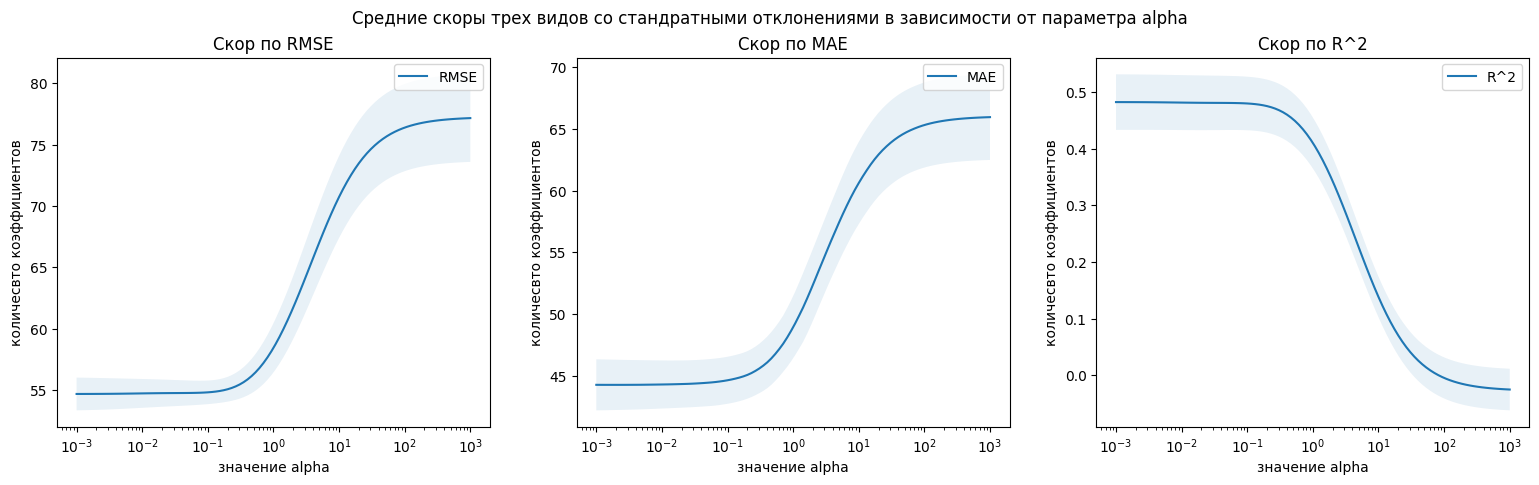

In [ ]:
# отобразим получивщиеся результаты

fig, axis = plt.subplots(1, 3)
fig.suptitle(
    'Средние скоры трех видов со стандратными отклонениями в зависимости от параметра alpha')
fig.set_figwidth(19)
# plt.title('Скоры по пяти фолдам')
plt.xscale('log')

for i, name in enumerate(('RMSE', 'MAE', 'R^2')):
    axis[i].set_title(f'Скор по {name}')
    axis[i].plot(lgspace, results[f'mean_test_{name}'], label=name)
    axis[i].fill_between(lgspace, results[f'mean_test_{name}'] - results[f'std_test_{name}'],
                         results[f'mean_test_{name}'] + results[f'std_test_{name}'], alpha=0.1)
    axis[i].legend()
    axis[i].set_xscale('log')

for ax in axis:
    ax.set(xlabel='значение alpha', ylabel='количесвто коэффициентов')

In [ ]:
best_RMSE = lgspace[np.argsort(results[f'mean_test_RMSE'])[0]]
best_MAE = lgspace[np.argsort(results[f'mean_test_MAE'])[0]]
# лучший -- значит наибольший скор
best_R = lgspace[np.argsort(results[f'mean_test_R^2'])[-1]]

In [ ]:
best_RMSE, best_MAE, best_R  # лучшие коэффициенты для Ridge регрессии

(0.001, 0.0023101297000831605, 0.001)

Видим примерно одну и ту же картину, что для всех трех метрик наилучшими являются малые коэффициенты alpha регуляризации

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

Средняя квадрата ошибки: 3017.444180631827
Медиана квадрата ошибки: 1375.1953138073413
Количество квадратов ошибок от 0.0001 до 0.001: 0
Количество квадратов ошибок от 0.001 до 0.01: 1
Количество квадратов ошибок от 0.01 до 0.1: 2
Количество квадратов ошибок от 0.1 до 1: 2
Количество квадратов ошибок от 1 до 10: 10
Количество квадратов ошибок от 10 до 100: 32
Количество квадратов ошибок от 100 до 1000: 92
Количество квадратов ошибок от 1000 до 10000: 149


Text(0, 0.5, 'Количество встреч')

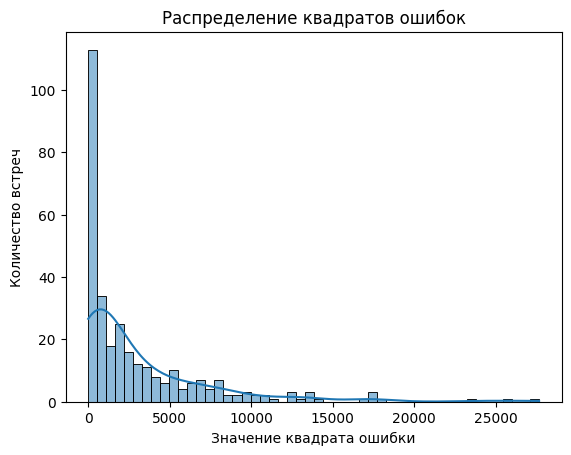

In [ ]:
from seaborn import histplot
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.001)

oof_preds = cross_val_predict(model, X_train, y_train)
deltas_sqr = (oof_preds - y_train) ** 2
indexes = np.argsort(-deltas_sqr)

# выведем числовые статистики по ошибкам
print(f'Средняя квадрата ошибки: {deltas_sqr.mean()}')
print(f'Медиана квадрата ошибки: {np.median(deltas_sqr)}')
for i in range(-4, 4):
    print(
        f'Количество квадратов ошибок от {(10 ** i)} до {10 ** (i + 1)}: {np.sum((deltas_sqr >= 10 ** i) & (deltas_sqr < 10 ** (i + 1)))}')

# посмотрим на распределение ошибок

plt.title('Распределение квадратов ошибок')
histplot(deltas_sqr, bins=50, kde=True)
plt.xlabel('Значение квадрата ошибки')
plt.ylabel('Количество встреч')

Видно, что большинство ошибок имеет малое удельное значение, однако для нескольких объектов, что подпадают под наши подозрения на то, чтобы быть выбросами, удельная величина ошибки весьма большая. Такие объекты сильно дестабилизируют модель, заставляют ее отвелкаться на себя, переобучаться специально на определеение таких же выбросов, как они.

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной (или, называемой валидационной) (X_test, y_test) выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [ ]:
from sklearn.metrics import mean_squared_error

cleared_indexes = deltas_sqr < 15000
print(f'Выборка уменьшилась на: {len(deltas_sqr) - np.sum(cleared_indexes)}')

# делаем бащовую модель для сравнения
general_model = LogisticRegression().fit(X_train, y_train)

# посмотрим на модель, обученную на очищенных данных
new_X_train = X_train[cleared_indexes]
new_y_train = y_train[cleared_indexes]
cleared_model = LogisticRegression().fit(new_X_train, new_y_train)

# посчитаем предсказания обеих моделей
general_predictions = general_model.predict(X_test)
predictions = cleared_model.predict(X_test)
print(
    f'Ошибка MSE на обычной модели:   {mean_squared_error(general_predictions, y_test)}')
print(
    f'Ошибка MSE на очищенной модели: {mean_squared_error(predictions, y_test)}')

print('\n======попробем отсечь слишком много объектов======')
# положим, все, что выше 7000, уже является шумом
cleared_indexes_wrong = deltas_sqr < 7000
print(
    f'Выборка уменьшилась на: {len(deltas_sqr) - np.sum(cleared_indexes_wrong)}')
new_X_train_wrong = X_train[cleared_indexes_wrong]
new_y_train_wrong = y_train[cleared_indexes_wrong]
cleared_model_wrong = LogisticRegression().fit(
    new_X_train_wrong, new_y_train_wrong)
predictions_wrong = cleared_model_wrong.predict(X_test)
print(
    f'Ошибка MSE на сломанной модели: {mean_squared_error(predictions_wrong, y_test)}')

Выборка уменьшилась на: 8
Ошибка MSE на обычной модели:   7582.368421052632
Ошибка MSE на очищенной модели: 6566.075187969925

======попробем отсечь слишком много объектов======
Выборка уменьшилась на: 41
Ошибка MSE на сломанной модели: 11869.541353383458


**Ответ:**
Посмотрев на диаграмму распределения ошибок и поигравшись с порогом отсечения шумовых объектов обучеющей выборки, мы смогли примерно определить порог ошибки на объекте, после которого объект считается ошибочным и претендентом на отбрасывание из выборки. Таким порогом считается 15000 и он отсекает 8 объектов.
После очищения выборки от этих объектов, MSE весомо упал, что гововит о существенной переобучении модели на этих объектах. Из-за них модель подстраивалась именно под выбросные объекты и плохо работала на рядовых

Однако при этом если мы попытаемся удалить слишком много объектов, посчитав шумовыми те, что дают хотя бы 7000 ошибки, то получим уже существенный прирост MSE. Это говорит о том, что часть удаленных объектов являлись качественными объектами генеральной совокупности, что нами разбивалась на train и test

## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [ ]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [ ]:
from sklearn.svm import SVC

linear_SVM = SVC(kernel='linear')
linear_SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# with open(f'/content/drive/MyDrive/Colab Notebooks/linear_svm.pickle', 'wb') as f:
#   pickle.dump(linear_SVM, f)

# with open(f'/content/drive/MyDrive/Colab Notebooks/linear_svm.pickle', 'rb') as f:
#   linear_SVM = pickle.load(f)

In [ ]:
# посчитаем лоссы на тестовой и трейновой части
print(
    f'Ошибка на обучении: {mean_squared_error(y_train, linear_SVM.predict(X_train), squared=False):.4f}')
print(
    f'Ошибка на тесте:    {mean_squared_error(y_test, linear_SVM.predict(X_test), squared=False):.4f}')

Ошибка на обучении: 0.3866
Ошибка на тесте:    0.3861


На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

ROC-AUC линейного SVM: 0.9257235321990244
PR-AUC линейного SVM:  0.9233770082201549




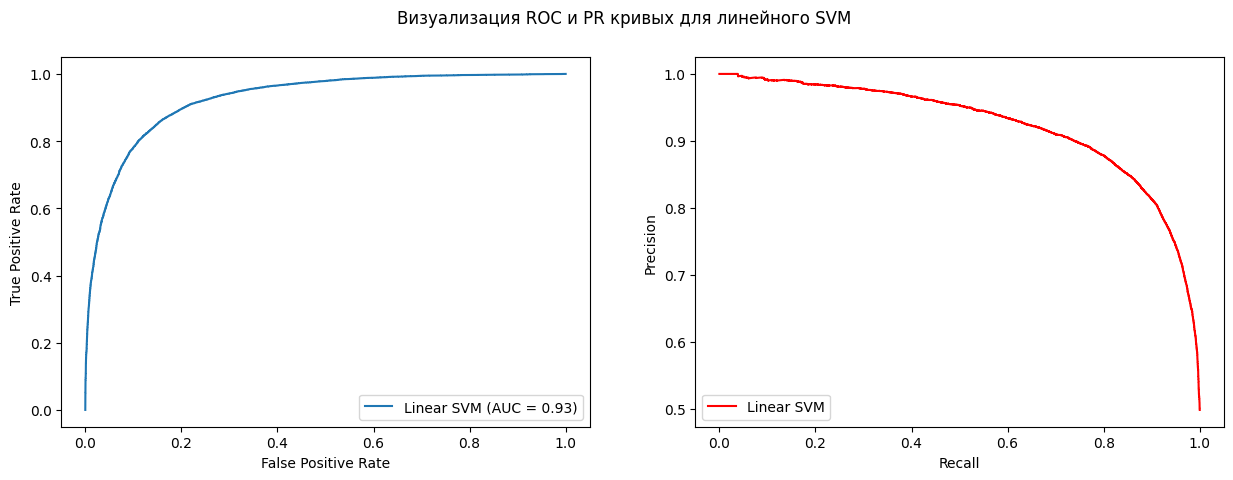

In [ ]:
from sklearn.metrics import auc, precision_recall_curve, average_precision_score, roc_curve
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# подсичтаем нужные данные для построения кривых
coefs_preds = linear_SVM.decision_function(X_test)
auc_curve = roc_curve(y_test, coefs_preds)
pr_curve = precision_recall_curve(y_test, coefs_preds)

# выведем площади под граффиками
print(f'ROC-AUC линейного SVM: {auc(auc_curve[0], auc_curve[1])}')
print(
    f'PR-AUC линейного SVM:  {average_precision_score(y_test, coefs_preds)}', end='\n\n\n')

# построим граффики для соответсвтующих кривых
fig, axis = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.suptitle('Визуализация ROC и PR кривых для линейного SVM')

RocCurveDisplay(fpr=auc_curve[0], tpr=auc_curve[1], roc_auc=auc(
    auc_curve[0], auc_curve[1]), estimator_name='Linear SVM').plot(ax=axis[0])
PrecisionRecallDisplay(
    precision=pr_curve[0], recall=pr_curve[1], estimator_name='Linear SVM').plot(ax=axis[1], c='r')

Видно, что модель имеет хорошую классификационную способность. Она **точно** и достаточно **полно** определяет класс 1 (если мы представляем классы в виде 1/0), при этом общая точность модели, представленная на ROC кривой, так же подтверждает это.

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

In [ ]:
from sklearn.svm import SVC

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, random_state=666)  # adskii satana

kernel_SVM = SVC(kernel='linear')
kernel_SVM.fit(X, y)

SVC(kernel='linear')

In [ ]:
# with open(f'/content/drive/MyDrive/Colab Notebooks/kernel_linear_svm.pickle', 'wb') as f:
#   pickle.dump(kernel_SVM, f)

# with open(f'/content/drive/MyDrive/Colab Notebooks/kernel_linear_svm.pickle', 'rb') as f:
#   kernel_SVM = pickle.load(f)

In [ ]:
# with open(f'/content/drive/MyDrive/Colab Notebooks/X_for_linear_SVM_and_LogReg.pickle', 'wb') as f:
#   pickle.dump(X, f)
# with open(f'/content/drive/MyDrive/Colab Notebooks/y_for_linear_SVM_and_LogReg.pickle', 'wb') as f:
#   pickle.dump(y, f)

# with open(f'/content/drive/MyDrive/Colab Notebooks/X_for_linear_SVM_and_LogReg.pickle', 'rb') as f:
#   X = pickle.load(f)
# with open(f'/content/drive/MyDrive/Colab Notebooks/y_for_linear_SVM_and_LogReg.pickle', 'rb') as f:
#   y = pickle.load(f)

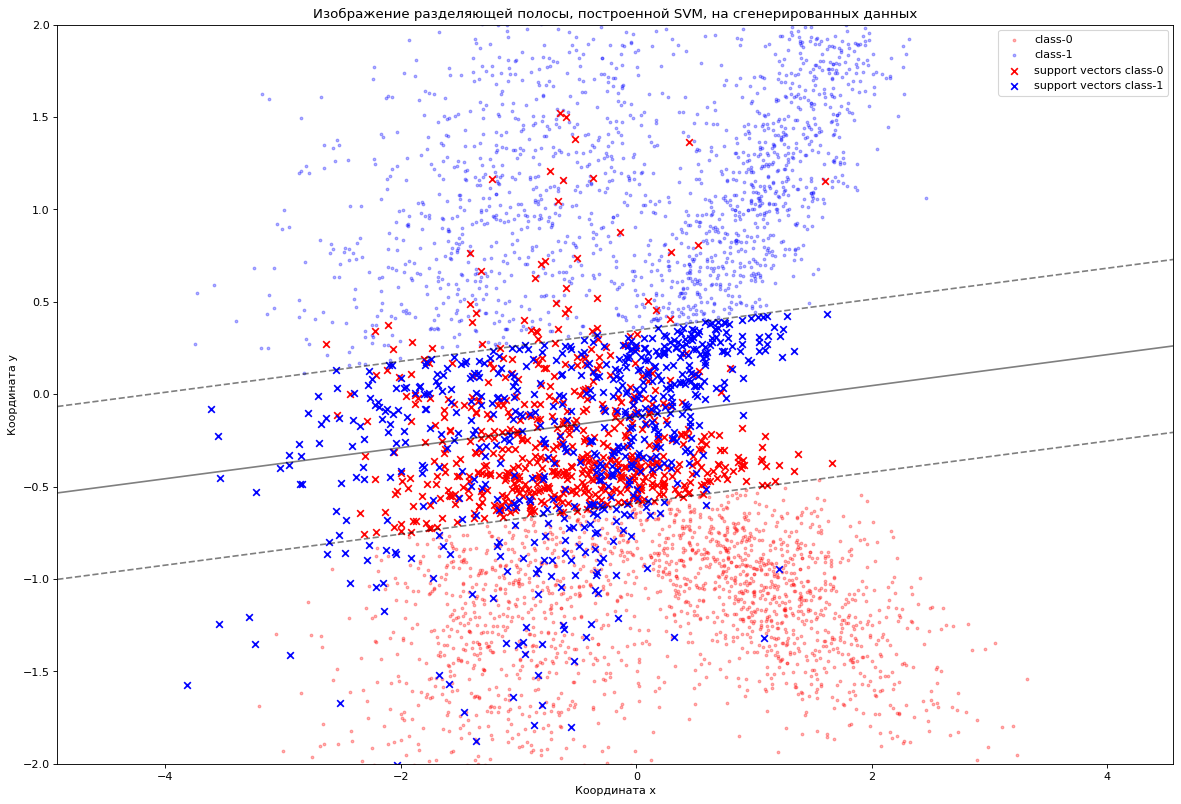

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

figure(figsize=(18, 12), dpi=80)

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', alpha=0.3, s=6, label='class-0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', alpha=0.3, s=6, label='class-1')
plt.ylim(-2, 2)

red_support_ind = kernel_SVM.support_[y[kernel_SVM.support_] == 0]
blue_support_ind = kernel_SVM.support_[y[kernel_SVM.support_] == 1]

plt.scatter(X[red_support_ind, 0], X[red_support_ind, 1],
            marker='x', c='r', label='support vectors class-0')
plt.scatter(X[blue_support_ind, 0], X[blue_support_ind, 1],
            marker='x', c='b', label='support vectors class-1')
ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    kernel_SVM,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

plt.title(
    'Изображение разделяющей полосы, построенной SVM, на сгенерированных данных')
plt.xlabel('Координата x')
plt.ylabel('Координата y')
plt.legend()

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых.

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [21]:
def plot_calibration_curve(y_test, preds, ax=None):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        # было -> bin_middle_points.append((l - r) / 2)
        # нужно заменить на +, ибо именно так считается средняя координата
        bin_middle_points.append((l + r) / 2)
        # было -> bin_real_ratios.append(np.min(y_test[(preds >= l) & (preds < r)] == 1))
        bucket = y_test[(preds >= l) & (preds < r)]
        bin_real_ratios.append(np.sum(bucket == 1) /
                               (len(bucket) if len(bucket) != 0 else 1))

    # даем возможность добавлять графики на существующие plots
    if ax is not None:
        ax.plot(bin_middle_points, bin_real_ratios)
    else:
        plt.plot(bin_middle_points, bin_real_ratios)

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [17]:
import pickle
with open(f'./kernel_linear_svm.pickle', 'rb') as f:
    kernel_SVM = pickle.load(f)
with open(f'./X_for_linear_SVM_and_LogReg.pickle', 'rb') as f:
    X = pickle.load(f)
with open(f'./y_for_linear_SVM_and_LogReg.pickle', 'rb') as f:
    y = pickle.load(f)

/Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/HW3/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[Text(0.5, 0, 'Отступ SVM'), Text(0, 0.5, 'Частота встречи значения')]

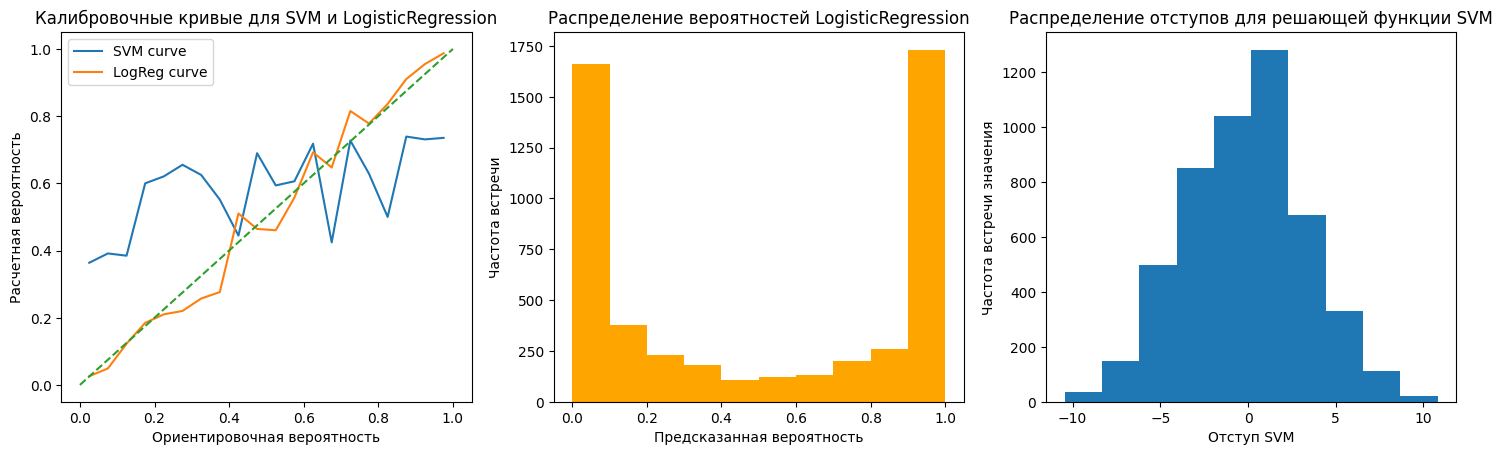

In [26]:
# возьмем задачу классификации, из прошлого пункта
# и обучим Логистическую регрессию
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression().fit(X, y)

fig, axis = plt.subplots(1, 3)
fig.set_figwidth(18)

axis[0].set_title('Калибровочные кривые для SVM и LogisticRegression')
plot_calibration_curve(y, kernel_SVM.decision_function(X), axis[0])
plot_calibration_curve(y, logregr.predict_proba(X)[:, 1], axis[0])
axis[0].set(xlabel='Ориентировочная вероятность',
            ylabel='Расчетная вероятность')
axis[0].legend(['SVM curve', 'LogReg curve'])
lns = np.linspace(0, 1, 10)
axis[0].plot(lns, lns, linestyle='--')

axis[1].set_title('Распределение вероятностей LogisticRegression')
axis[1].hist(logregr.predict_proba(X)[:, 1], color="orange")
axis[1].set(xlabel='Предсказанная вероятность',
            ylabel='Частота встречи')

axis[2].set_title('Распределение отступов для решающей функции SVM')
axis[2].hist(kernel_SVM.decision_function(X))
axis[2].set(xlabel='Отступ SVM',
            ylabel='Частота встречи значения')

Можно справедливо заметить, что чисто по своей природе, SVM не имеет в качестве своей decision_function ничего подобного вероятностям. А потому не очен честно в лоб его сравнивать с выходом вероятностей той же Logistic Regression. Самое просто, что приходит в голову -- провести отображение decision_function сигмоидой. Тем самым, мы можем сказать, что будто бы svm явялется сложным и внутренним слоем модели регресии, что находит margin. 

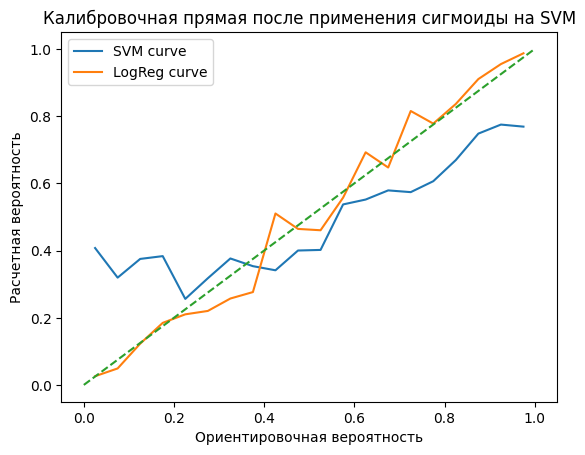

In [29]:
from scipy.special import expit
plt.title('Калибровочная прямая после применения сигмоиды на SVM')
axis = plt.gca()
plot_calibration_curve(y, kernel_SVM.decision_function(expit(X)), axis)
plot_calibration_curve(y, logregr.predict_proba(X)[:, 1], axis)
axis.set(xlabel='Ориентировочная вероятность',
         ylabel='Расчетная вероятность')
axis.legend(['SVM curve', 'LogReg curve'])
lns = np.linspace(0, 1, 10)
axis.plot(lns, lns, linestyle='--')

**Ответ:**

Функции действительно стали больше походить друг на друго, но до сих пор не приходится говорить. Первое, что бросается в глаза, существенная разница между гистограммами распределений ответов вероятности LogRegr и значением функции отсутпа в SVM. Большинство отступов находятся вблизи разделяющей гиперплоскости. Однако мы не можем ничего утверждать о реальных значениях вероятностей, выдаваемых классификатором SVM. Косвенно это подтверждается калибровочной кривой, где показатели SVM хуже соотносятся с гипотизой и распределении.

Я считаю, причина такого поведения SVM заключается в том, что в обычном виде мы не можем считать значения decision_function как функции, отражающей вероятности (даже масштабируемые), SVM не имеет прямой вероятностной модели за собой.

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

[Text(0.5, 0, 'Предсказанная вероятность'), Text(0, 0.5, 'Частота встречи')]

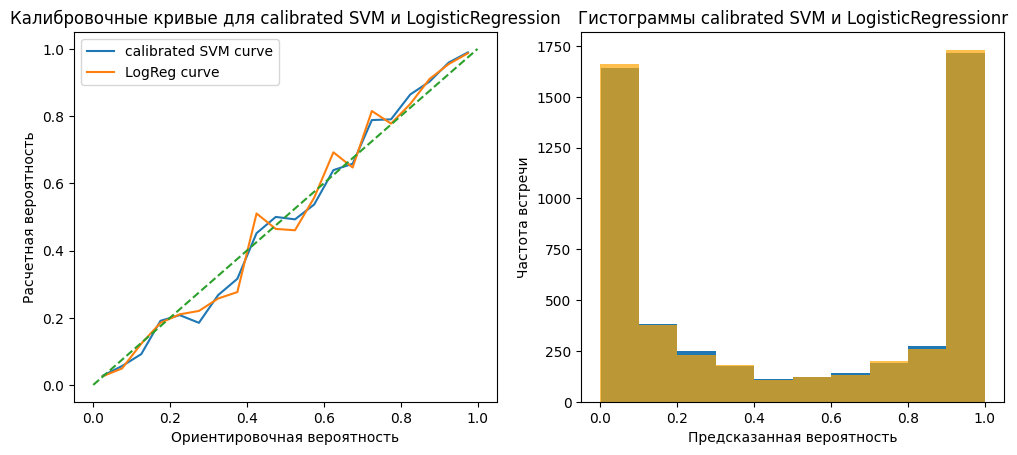

In [25]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_SVM = CalibratedClassifierCV(kernel_SVM, cv=5, method='sigmoid')
calibrated_SVM.fit(X, y)
probabilities = calibrated_SVM.predict_proba(X)[:, 1]

fig, axis = plt.subplots(1, 2)
fig.set_figwidth(12)

axis[0].set_title(
    'Калибровочные кривые для calibrated SVM и LogisticRegression')
plot_calibration_curve(y, probabilities, axis[0])
plot_calibration_curve(y, logregr.predict_proba(X)[:, 1], axis[0])
axis[0].set(xlabel='Ориентировочная вероятность',
            ylabel='Расчетная вероятность')
axis[0].legend(['calibrated SVM curve', 'LogReg curve'])
lns = np.linspace(0, 1, 10)
axis[0].plot(lns, lns, linestyle='--')

axis[1].set_title('Гистограммы calibrated SVM и LogisticRegressionr')
axis[1].hist(probabilities, label='calibrated SVM')
axis[1].hist(logregr.predict_proba(X)[:, 1], color="orange",
             label='LogisticRegr', alpha=0.7)
axis[1].set(xlabel='Предсказанная вероятность',
            ylabel='Частота встречи')

**Ответ:**

Можно точно сказать, что показатели сильно улучшились. Видно, что обе моделей имеют общие локальные тренды роста и падения, что собственно говоря, хорошо, как для модели без вероятностной постановки задачи

Выше мы смотрели, как будет вести себя каллибровка, если мы применим ее не только на train и будем смотреть на test, но применили ее на обученную можель на всем dataset. Посмотрим, как поведет себя модель, если откалибровать ее по train, но посмотреть уже на test

[Text(0.5, 0, 'Предсказанная вероятность'), Text(0, 0.5, 'Частота встречи')]

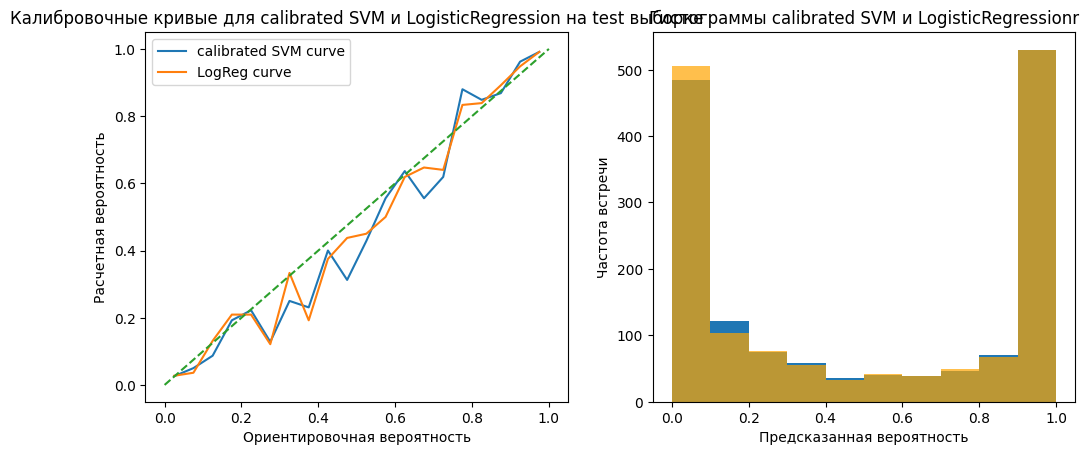

In [24]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=667)  # no more adskii satana

logregr = LogisticRegression().fit(X, y)
calibrated_SVM = CalibratedClassifierCV(kernel_SVM, cv=5, method='sigmoid')
calibrated_SVM.fit(X_train, y_train)
probabilities = calibrated_SVM.predict_proba(X_test)[:, 1]


fig, axis = plt.subplots(1, 2)
fig.set_figwidth(12)

axis[0].set_title(
    'Калибровочные кривые для calibrated SVM и LogisticRegression на test выборке')
plot_calibration_curve(y_test, probabilities, axis[0])
plot_calibration_curve(y_test, logregr.predict_proba(X_test)[:, 1], axis[0])
axis[0].set(xlabel='Ориентировочная вероятность',
            ylabel='Расчетная вероятность')
axis[0].legend(['calibrated SVM curve', 'LogReg curve'])
lns = np.linspace(0, 1, 10)
axis[0].plot(lns, lns, linestyle='--')

axis[1].set_title('Гистограммы calibrated SVM и LogisticRegressionr')
axis[1].hist(probabilities, label='calibrated SVM')
axis[1].hist(logregr.predict_proba(X_test)[:, 1], color="orange",
             label='LogisticRegr', alpha=0.7)
axis[1].set(xlabel='Предсказанная вероятность',
            ylabel='Частота встречи')

Получили примерно такое же поведение моделей, за исключением малейшего отклонения от бисектрисы.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

Воспользуемся методом Сигмоидново приблежения вероятностей. Для этого нам потребуется модель с явным интерфейсом (возможностью) показывать отступ (decision_function), что мы будем калибровать, а так же дополнительная модель логистической регрессии за ее очень удобную способность вычислять вероятности.

Идея Калибровки Платта проста: если мы имеем модель, имеющая вохможность показывать отступ объекта от состояния, где мы равновероятно можем поставить в соостветсвие оба класса, то явным образом можно выбрать любую такую функцию, ограниченную 0 и 1, всюду имеющую на прямой разделяющей классы значение 0.5, что мы могли бы считать вероятностью. С другой стороны такая функцию вряд ли окажется той самой, что могла бы максимизировать статистику макимального правдоподобия. Учитывая, что у нас задача с Бернулевским распределением, применим такую сигмоидную функцию, что максимизировала статистику максимального правдоподобия: $$P\left(y_i=1 \mid x_i\right)=\sigma\left(a q\left(x_i\right)+b\right)=\frac{1}{1+e^{-a q\left(x_i\right)-b}}$$

Где параметры $a$ и $b$ -- обучаемые параметры

Таким образом задача сводится к решению Логистической регрессии, где единственным входным параметром будем именно отступ от границы, разделяющей классы

> Важным замечанием здесь будет то, что не обязательно решать задачу классифкации LogisticRegression. Мы могли подобрать значения по сетке, однако такое решение глупее, прямолинейнее и менее эффективно.





In [ ]:
from copy import deepcopy


class SigmoidCalibration:
    def __init__(self, model, refit=False):
        self.model = deepcopy(model)
        self.refit = refit

    def fit(self, X, y):
        if self.refit:
            self.model.fit(X, y)
        self.prob_model = LogisticRegression().fit(
            self.model.decision_function(X).reshape(-1, 1), y)

        return self

    def predict(self, X):
        return self.prob_model.predict(self.model.decision_function(X).reshape(-1, 1))

    def predict_proba(self, X):
        return self.prob_model.predict_proba(self.model.decision_function(X).reshape(-1, 1))

In [ ]:
# сгенерируем новые данные
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
X, y = make_classification(n_samples=10000, n_features=10,
                           n_informative=6, n_redundant=2, random_state=666)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=667)

small_svm = SVC(kernel='linear').fit(X_train, y_train)
calibrated_svm = SigmoidCalibration(small_svm).fit(X_train, y_train)

# посчитаем ошибки

print(
    f'MSE на чистом SVM:    {mean_squared_error(y_test, small_svm.predict(X_test))}')
print(
    f'MSE на калиброванном: {mean_squared_error(y_test, calibrated_svm.predict(X_test))}')
print(
    f'MAE на чистом SVM:    {mean_absolute_error(y_test, small_svm.predict(X_test))}')
print(
    f'MAE на калиброванном: {mean_absolute_error(y_test, calibrated_svm.predict(X_test))}')
print(f'R^2 на чистом SVM:    {r2_score(y_test, small_svm.predict(X_test))}')
print(
    f'R^2 на калиброванном: {r2_score(y_test, calibrated_svm.predict(X_test))}')

MSE на чистом SVM:    0.13633333333333333
MSE на калиброванном: 0.13933333333333334
MAE на чистом SVM:    0.13633333333333333
MAE на калиброванном: 0.13933333333333334
R^2 на чистом SVM:    0.4545791569225105
R^2 на калиброванном: 0.44257723128021864


Мы видим, что после применения калибровки, качество модели осталось на том же уровне, в то время как сам классификатор научился определять вероятности классификации на бинарные классы

Осталось заметить, что калибровка методом Платта является самой простой для реализации, хотя существуюи и прочие методы, такие как:

*   Гистограммная калибровка
*   Изотоническая регрессия

**Начнем с Гистограммного подхода:**

Нам требуется разбить отрезок [0, 1] на равные части $\mathbb{B}_j$, для каждой из которых мы хотим предскащывать одинаковую веротяность $\theta_j$, если модель $a(x_i) \in \mathbb{B}_j$. Для этого сама модель обязана выдавать значения из [0, 1] для каждого объекта. Вероятности подбираются так, чтобы они как можно лучше приближали средние метки классов на соответствующих бинах; иными словами, мы решаем задачу
$$\sum_{j=1}^k\left|\frac{\sum_{i=1}^N \mathbb{1}\left\{a\left(x_i\right) \in \mathbb{B}_j\right\} y_i}{\left|\mathbb{B}_j\right|}-\theta_j\right| \longrightarrow \min _{\left(\theta_1, \ldots, \theta_k\right)}$$


**Изотоническая регрессия:**

Идет дальше, и предсказывает не только вероятности, но и границы каждого бакета. Однако решение задачи оптимизации для такой задачи методом pool adjacent violators algorithm слишком огромная, чтобы тут писать.

В любом случае у таких алгоритмов есть проблемное место -- они умеют предсказывать лишь дискретное число вероятностей.



## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [37]:
data = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/train.csv', index_col=0)

target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [40]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, make_scorer

lgspace = np.logspace(-3, 3, num=10)
best_logreg = LogisticRegression(
    fit_intercept=True, random_state=666, max_iter=100, n_jobs=5, solver='saga')
grid_search = GridSearchCV(best_logreg,
                           param_grid={'penalty': [
                               'elasticnet', 'l1', 'l2'], 'C': lgspace},
                           scoring=make_scorer(
                               mean_squared_error, squared=False),
                           refit=True,
                           n_jobs=3,
                           cv=5
                           )
grid_search.fit(X_train, y_train)
results = grid_search.cv_results_

In [43]:
from sklearn.linear_model import LogisticRegression
best_logreg = LogisticRegression(C=0.4641, penalty='l2', solver='liblinear')
best_logreg.fit(X_train, y_train)

LogisticRegression(C=0.4641, solver='liblinear')

In [36]:
import pickle
# with open(f'/content/drive/MyDrive/Colab Notebooks/best_logreg.pickle', 'wb') as f:
#   pickle.dump(best_logreg, f)

# with open(f'/content/drive/MyDrive/Colab Notebooks/best_logreg.pickle', 'rb') as f:
#   best_logreg = pickle.load(f)

/Users/artemon/Library/Mobile Documents/com~apple~CloudDocs/Programming/python_projects/Pracx/MMRO/HW3/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

Text(0.5, 0.9, 'PR-AUC:  0.611')

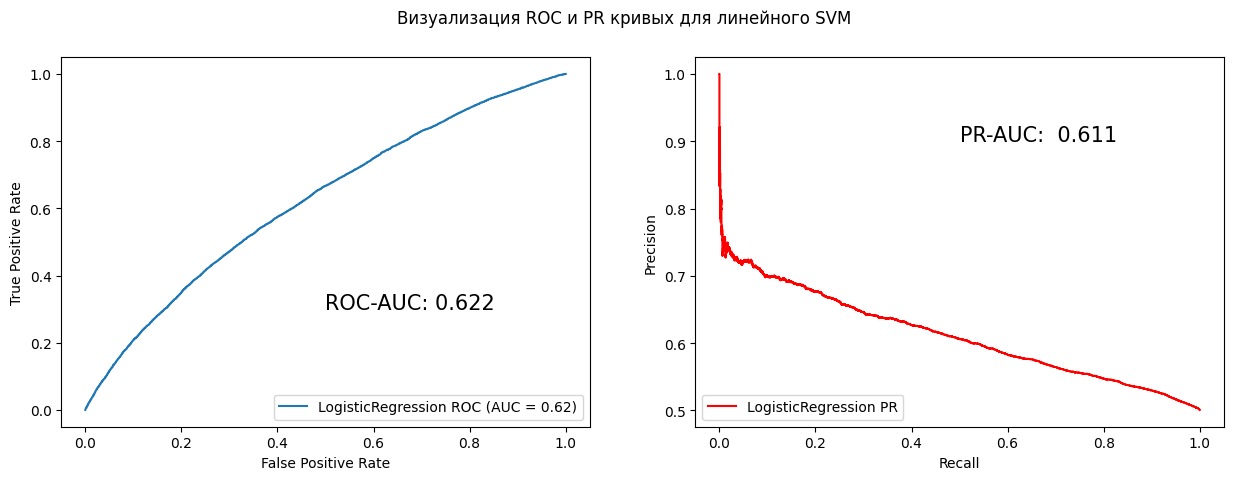

In [44]:
from sklearn.metrics import auc, precision_recall_curve, roc_curve, average_precision_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Посчитаем нужные показатели для построения кривых
coefs_preds = best_logreg.predict_proba(X_test)[:, 1]
roc_curve = roc_curve(y_test, coefs_preds)
pr_curve = precision_recall_curve(y_test, coefs_preds)

# построим граффики для соответсвтующих кривых
fig, axis = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.suptitle('Визуализация ROC и PR кривых для линейного SVM')

RocCurveDisplay(fpr=roc_curve[0], tpr=roc_curve[1], roc_auc=auc(
    roc_curve[0], roc_curve[1]), estimator_name='LogisticRegression ROC').plot(ax=axis[0])
PrecisionRecallDisplay(precision=pr_curve[0], recall=pr_curve[1],
                       estimator_name='LogisticRegression PR').plot(ax=axis[1], c='r')

axis[0].annotate(
    f'ROC-AUC: {auc(roc_curve[0], roc_curve[1]):.3f}', (0.5, 0.3), fontsize=15)
axis[1].annotate(
    f'PR-AUC:  {average_precision_score(y_test, coefs_preds):.3f}', (0.5, 0.9), fontsize=15)

**Ответ:**

Модель имеет особенность, что чтобы предсказывать положительный класс хоть сколько-нибудь полно, она обязана очень резко и очень сильно потерять в точности предсказания 1 класса. Это означает, что большая доля объектов -1 класса имеет почти такие же ответы модели, что и настоящие 1 объекты. С другой стороны общее качество модели не самое плохое и ROC находится выше линии бисектрисы


__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

Дополнительная часть
Посмотрим на то, как будет вести себя можель, если мы будем ее постепенно обучать на частях выборки, подавая ее порционно. Иными словами, похожа ли наша модель в этом плане например на метод KNN

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

lgsp = np.logspace(-3, 3, 10)

loss_score_curves = defaultdict(lambda: {
    'l1_scores_train': [],
    'l1_scores_test': [],
    'l2_scores_train': [],
    'l2_scores_test': [],

    'l1_loss_train': [],
    'l1_loss_test': [],
    'l2_loss_train': [],
    'l2_loss_test': [],
})

model_l1 = LogisticRegression(
    penalty='l1', C=0.5, solver='saga', warm_start=True)
model_l2 = LogisticRegression(
    penalty='l2', C=0.5, solver='lbfgs', warm_start=True)

for alpha in lgsp:
    for _, fold_train in KFold(X_train.shape[0] // 5000, shuffle=True, random_state=666).split(X_train):
        model_l1.fit(X_train[fold_train], y_train[fold_train])
        model_l2.fit(X_train[fold_train], y_train[fold_train])

        loss_score_curves[alpha]['l1_scores_train'].append(
            model_l1.score(X_train, y_train))
        loss_score_curves[alpha]['l1_scores_test'].append(
            model_l1.score(X_test, y_test))
        loss_score_curves[alpha]['l1_loss_train'].append(
            mean_squared_error(y_train, model_l1.predict(X_train)))
        loss_score_curves[alpha]['l1_loss_test'].append(
            mean_squared_error(y_test, model_l1.predict(X_test)))

        loss_score_curves[alpha]['l2_scores_train'].append(
            model_l2.score(X_train, y_train))
        loss_score_curves[alpha]['l2_scores_test'].append(
            model_l2.score(X_test, y_test))
        loss_score_curves[alpha]['l2_loss_train'].append(
            mean_squared_error(y_train, model_l2.predict(X_train)))
        loss_score_curves[alpha]['l2_loss_test'].append(
            mean_squared_error(y_test, model_l2.predict(X_test)))

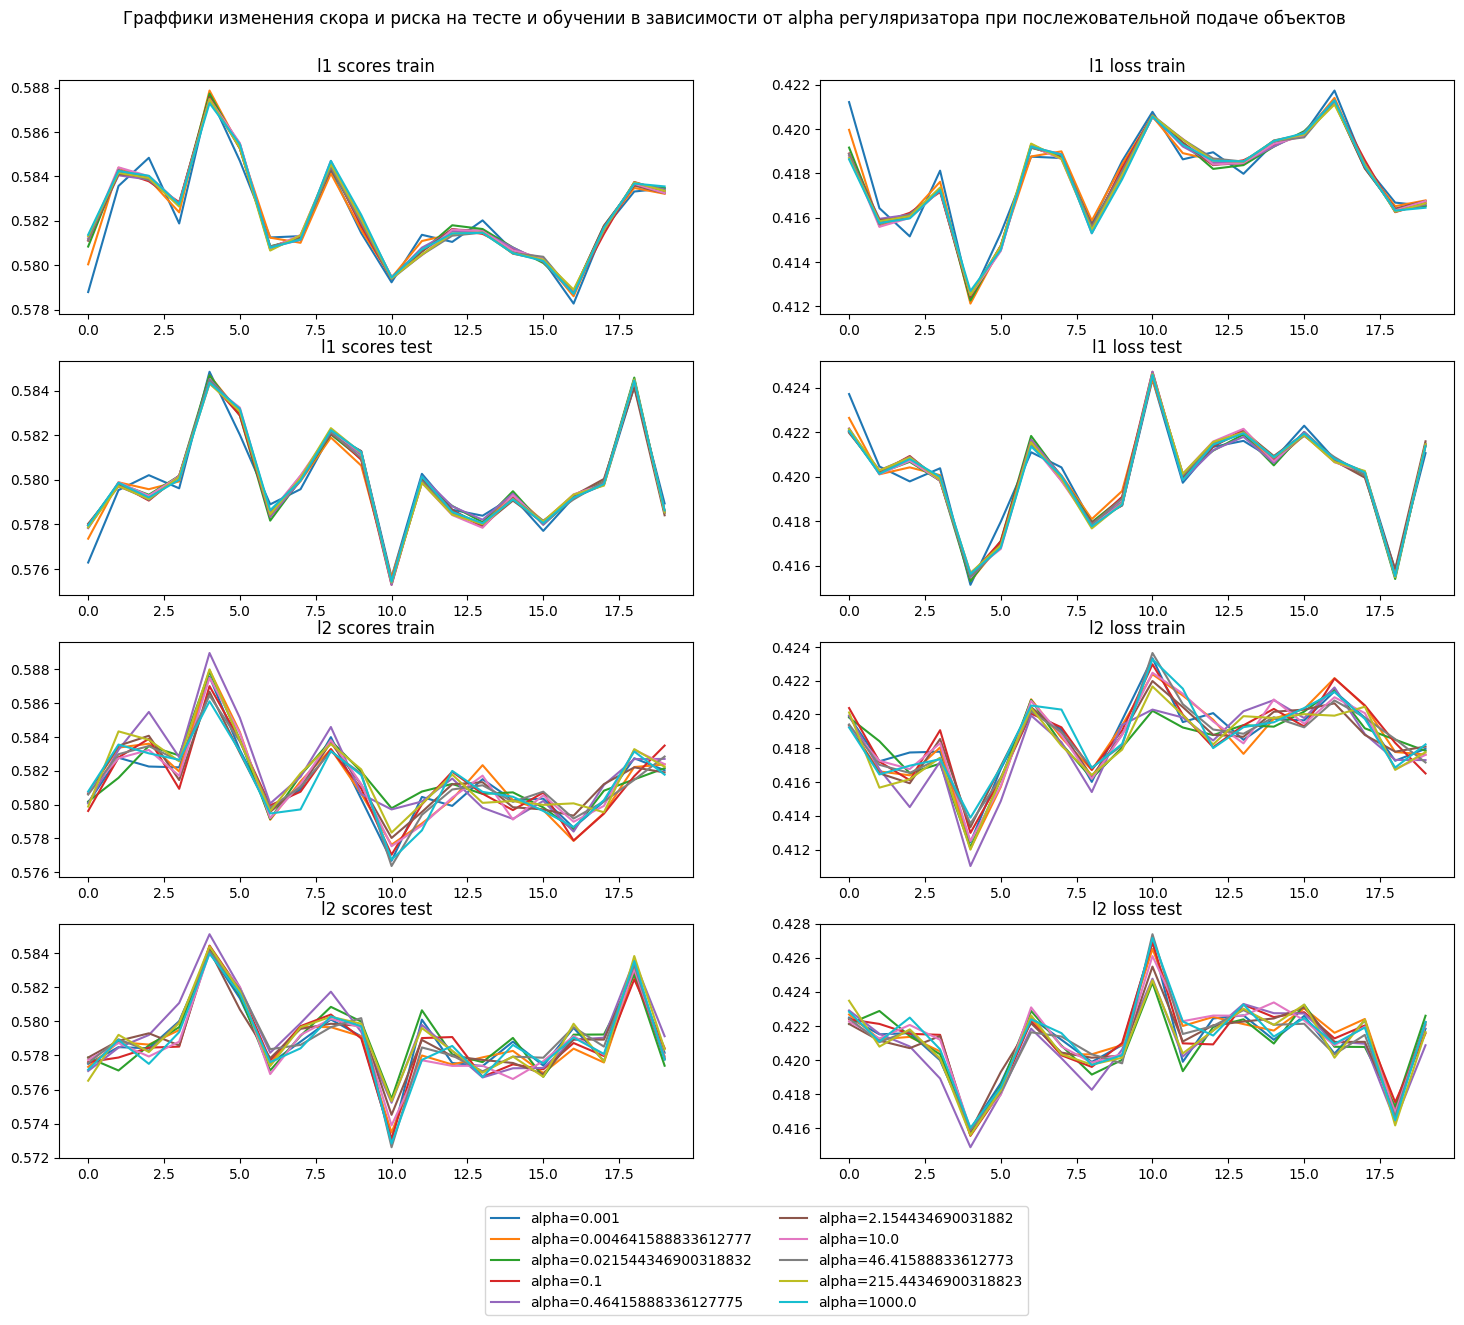

In [65]:
fig, axis = plt.subplots(4, 2)
fig.set_figheight(14)
fig.set_figwidth(18)
title = fig.suptitle(
    'Граффики изменения скора и риска на тесте и обучении в зависимости от alpha регуляризатора при послежовательной подаче объектов')
title.set_position([.5, 0.93])
for alpha, curves in loss_score_curves.items():
    axis[0][0].set_title('l1 scores train')
    axis[0][0].plot(range(len(curves['l1_scores_train'])),
                    curves['l1_scores_train'], label=f'alpha={alpha}')

    axis[0][1].set_title('l1 loss train')
    axis[0][1].plot(range(len(curves['l1_loss_train'])),
                    curves['l1_loss_train'], label=f'alpha={alpha}')

    axis[1][0].set_title('l1 scores test')
    axis[1][0].plot(range(len(curves['l1_scores_test'])),
                    curves['l1_scores_test'], label=f'alpha={alpha}')

    axis[1][1].set_title('l1 loss test')
    axis[1][1].plot(range(len(curves['l1_loss_test'])),
                    curves['l1_loss_test'], label=f'alpha={alpha}')

    axis[2][0].set_title('l2 scores train')
    axis[2][0].plot(range(len(curves['l2_scores_train'])),
                    curves['l2_scores_train'], label=f'alpha={alpha}')

    axis[2][1].set_title('l2 loss train')
    axis[2][1].plot(range(len(curves['l2_loss_train'])),
                    curves['l2_loss_train'], label=f'alpha={alpha}')

    axis[3][0].set_title('l2 scores test')
    axis[3][0].plot(range(len(curves['l2_scores_test'])),
                    curves['l2_scores_test'], label=f'alpha={alpha}')

    axis[3][1].set_title('l2 loss test')
    axis[3][1].plot(range(len(curves['l2_loss_test'])),
                    curves['l2_loss_test'], label=f'alpha={alpha}')
plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(-0.1, -0.7))

Видно, что пытаться обучать модель по частям, раз за разом на новом батче данных, плохая идея, так как можель раз за разом переобучается под учловия каждого такого батча

Теперь посмотрим на сразу два эффекта:


1.   Построим кривую качества обучения модели логистической регресси с $L_2$
2.   Помотрим на асциляцию каечства модели логистической регресси с $L_1$

Суть эксперимента заклбючается в том, чтобы отобразить процесс обучения модели с изменением loss и score при последовательном обучении шаг за шагом. Идея изначально была в том, чтобы отобразить такое для трех видов регуляризации:

*   $L_1$
*   $L_2$
*   $ElasticNet$

> Однако для бучения $ElasticNet$ в sklearn, насколько я могу судить, есть баг, из-за чего я никак не смог этого сделать, при чем на форумах об этом тоже писали. Но что более интересно, это то, что единственный **не стохастический** алгоритм, что поддерживает $L_1$ не поддерживает warm_start, из-за чего имеет смысл лишь стохастические методы для обучения таких моделей в нашем случае: $saga$, - что как написано в документации имеет под собой стохастический градиентный спуск

Было решено воспользоваться таким подарком судбы и заодно с обучением модели $L_2$, как просили в задании, посмотреть на то, как работет модель со стохастическим градиентом. Для этого была выбрана модель $L_1$

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()

lgsp = np.logspace(-3, 3, 10)

loss_score_curves_new = defaultdict(lambda: {
    'l1_scores_train': [],
    'l1_scores_test': [],
    'l2_scores_train': [],
    'l2_scores_test': [],

    'l1_loss_train': [],
    'l1_loss_test': [],
    'l2_loss_train': [],
    'l2_loss_test': [],
})

model_l1 = LogisticRegression(
    penalty='l1', C=0.5, solver='saga', warm_start=True, max_iter=1)
model_l2 = LogisticRegression(
    penalty='l2', C=0.5, solver='lbfgs', warm_start=True, max_iter=1)

for i in range(0, 200):
    for alpha in lgsp:
        model_l1.fit(X_train, y_train)
        model_l2.fit(X_train, y_train)

        loss_score_curves_new[alpha]['l1_scores_train'].append(
            model_l1.score(X_train, y_train))
        loss_score_curves_new[alpha]['l1_scores_test'].append(
            model_l1.score(X_test, y_test))
        loss_score_curves_new[alpha]['l1_loss_train'].append(
            mean_squared_error(y_train, model_l1.predict(X_train)))
        loss_score_curves_new[alpha]['l1_loss_test'].append(
            mean_squared_error(y_test, model_l1.predict(X_test)))

        loss_score_curves_new[alpha]['l2_scores_train'].append(
            model_l2.score(X_train, y_train))
        loss_score_curves_new[alpha]['l2_scores_test'].append(
            model_l2.score(X_test, y_test))
        loss_score_curves_new[alpha]['l2_loss_train'].append(
            mean_squared_error(y_train, model_l2.predict(X_train)))
        loss_score_curves_new[alpha]['l2_loss_test'].append(
            mean_squared_error(y_test, model_l2.predict(X_test)))

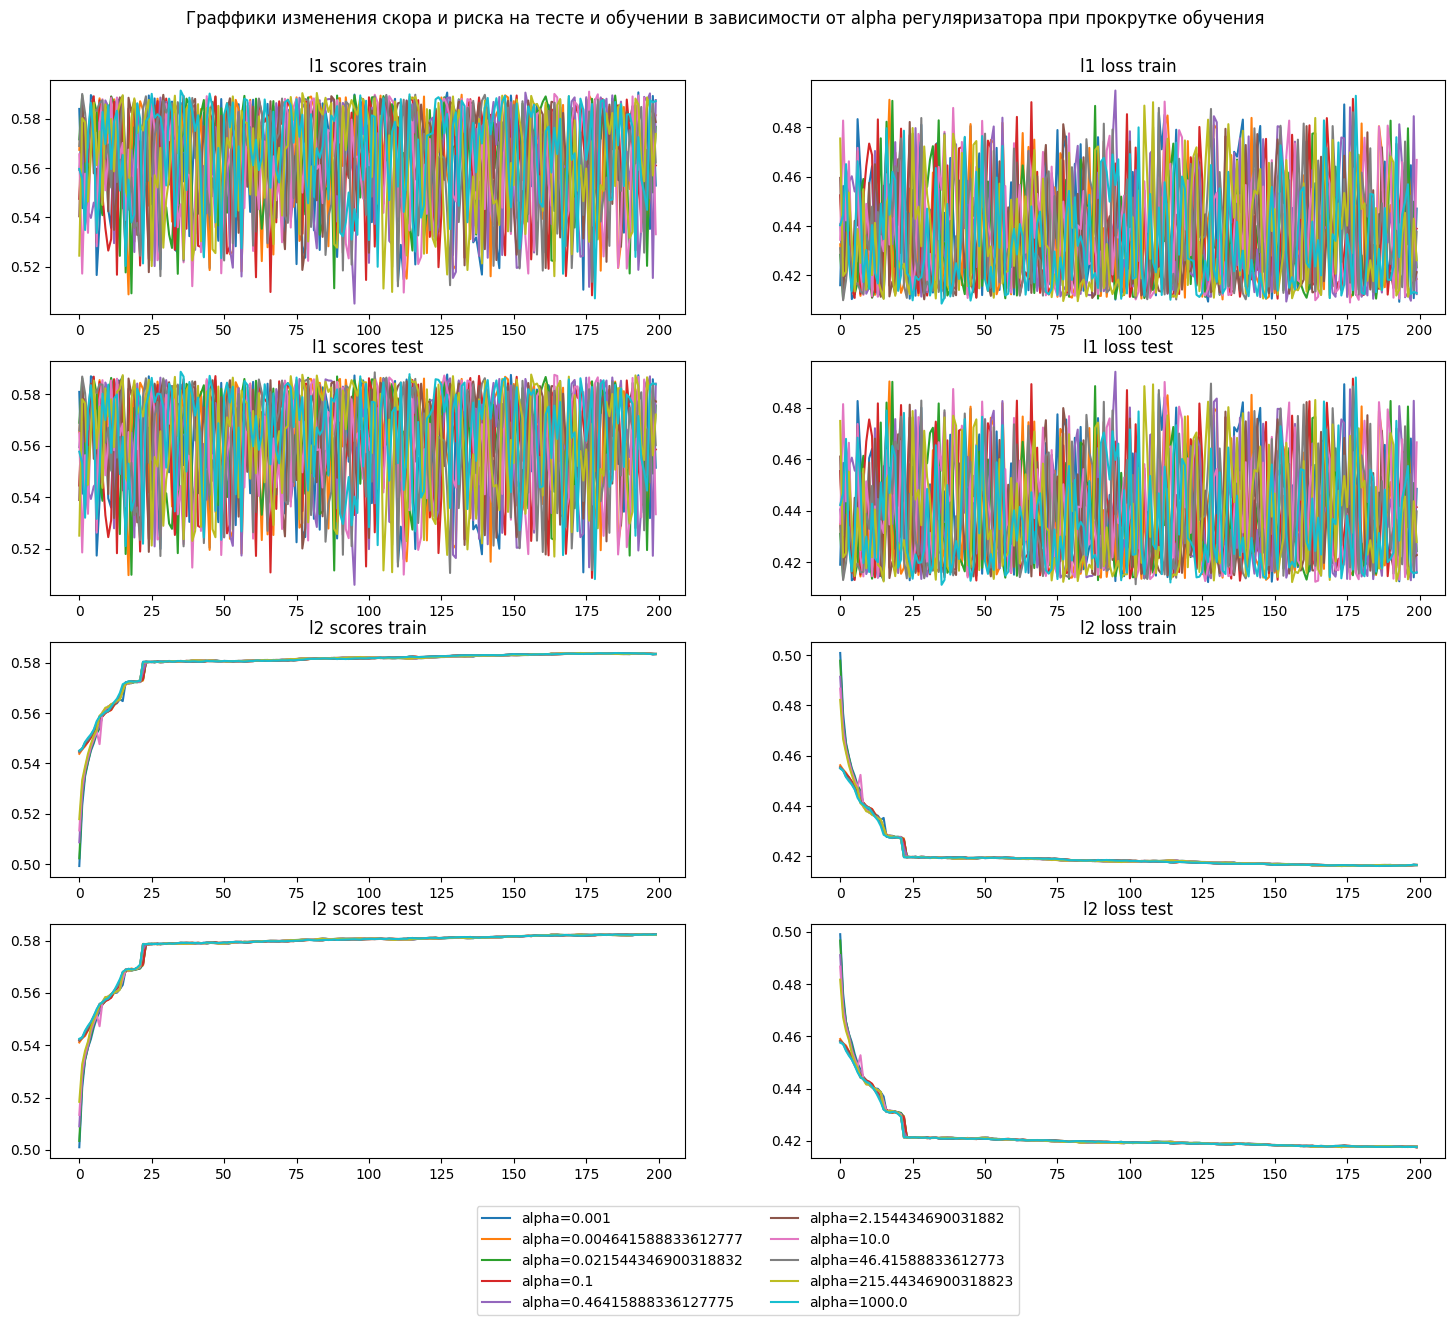

In [67]:
fig, axis = plt.subplots(4, 2)
fig.set_figheight(14)
fig.set_figwidth(18)
title = fig.suptitle(
    'Граффики изменения скора и риска на тесте и обучении в зависимости от alpha регуляризатора при прокрутке обучения')
title.set_position([.5, 0.93])
for alpha, curves in loss_score_curves_new.items():
    axis[0][0].set_title('l1 scores train')
    axis[0][0].plot(range(len(curves['l1_scores_train'])),
                    curves['l1_scores_train'], label=f'alpha={alpha}')

    axis[0][1].set_title('l1 loss train')
    axis[0][1].plot(range(len(curves['l1_loss_train'])),
                    curves['l1_loss_train'], label=f'alpha={alpha}')

    axis[1][0].set_title('l1 scores test')
    axis[1][0].plot(range(len(curves['l1_scores_test'])),
                    curves['l1_scores_test'], label=f'alpha={alpha}')

    axis[1][1].set_title('l1 loss test')
    axis[1][1].plot(range(len(curves['l1_loss_test'])),
                    curves['l1_loss_test'], label=f'alpha={alpha}')

    axis[2][0].set_title('l2 scores train')
    axis[2][0].plot(range(len(curves['l2_scores_train'])),
                    curves['l2_scores_train'], label=f'alpha={alpha}')

    axis[2][1].set_title('l2 loss train')
    axis[2][1].plot(range(len(curves['l2_loss_train'])),
                    curves['l2_loss_train'], label=f'alpha={alpha}')

    axis[3][0].set_title('l2 scores test')
    axis[3][0].plot(range(len(curves['l2_scores_test'])),
                    curves['l2_scores_test'], label=f'alpha={alpha}')

    axis[3][1].set_title('l2 loss test')
    axis[3][1].plot(range(len(curves['l2_loss_test'])),
                    curves['l2_loss_test'], label=f'alpha={alpha}')
plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(-0.1, -0.7))

Разными цветами тут отмечены различные alpha. Осталось лишь заметить, что для стохастического алгоритма оптимизации характерно постоянное асцилирование около оптимума.
Для $L_2$ регуляризатора же мы видим почти одинкаовую картину, все ветви рано или поздно стремятся к одному оптимуму, и вместе выходят на одно плато. Различные alpha лишь отвечают за скорость схождения на первых 5-10 итерациях.


## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [ ]:
data = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from time import time

start = time()
lgregr = LogisticRegression(C=0.4641, penalty='l2',
                            solver='liblinear').fit(X_train, y_train)
end = time()

print(
    f'ROC-AUC на нетронутой выборке: {roc_auc_score(y_test, lgregr.predict_proba(X_test)[:, 1])}')
print(f'Время fit: {end - start}')

ROC-AUC на нетронутой выборке: 0.6250627326009033
Время fit: 12.634244918823242


__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# all columns with less than 20 unique values
categorical = data.columns[data.nunique() < 105]
one_not_encoder = OneHotEncoder(
    handle_unknown="ignore", sparse_output=False).fit(data[categorical])


def one_hot_encode(m: np.ndarray):
    m_temp = m.drop(columns=categorical)
    return np.concatenate([m_temp, one_not_encoder.transform(m[categorical])], axis=1)


X_train_encoded = one_hot_encode(X_train)
X_test_encoded = one_hot_encode(X_test)

print(f'Старое число признаков: {X_train.shape[1]}')
print(f'Новое число признаков: {X_train_encoded.shape[1]}')

Старое число признаков: 57
Новое число признаков: 480


In [ ]:
from sklearn.metrics import mean_squared_error
start_base = time()
base_model = LogisticRegression(
    C=0.4641, penalty='l2', solver='liblinear').fit(X_train, y_train)
end_base = time()

start_enc = time()
encoded_model = LogisticRegression(
    C=0.4641, penalty='l2', solver='liblinear').fit(X_train_encoded, y_train)
end_enc = time()

print('========================== Сравнение времени ==========================')
print(f'Время обучения нетронутой модели:           {end_base - start_base}')
print(f'Время обучения модели после OneHotencoding: {end_enc - start_enc}')
print('========================== Сравнение качества =========================')
print(
    f'Риск на нетронутой модели: {mean_squared_error(y_test, base_model.predict(X_test))}')
print(
    f'Риск на модели после OneHotencoding: {mean_squared_error(y_test, encoded_model.predict(X_test_encoded))}')

========================== Сравнение времени ==========================
Время обучения нетронутой модели:           13.25010371208191
Время обучения модели после OneHotencoding: 17.966477394104004
========================== Сравнение качества =========================
Риск на нетронутой модели: 0.41172
Риск на модели после OneHotencoding: 0.39859


Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки.

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

In [ ]:
from collections import defaultdict


class CounterEncoder:
    def __init__(self, rand_coef=0.2):
        self.rand_coef = rand_coef

    def fit(self, data, target, categories):
        self._categories = categories

        # если в трансформе не встретим нового атрибута, мы ставим ноль на его место
        self._cat_and_values = defaultdict(lambda: defaultdict(lambda: 0))
        for col in self._categories:
            for value in data[col].unique():
                indexes = (data[col] == value).values
                self._cat_and_values[col][value] = np.mean(
                    target[indexes] + np.random.normal(0, self.rand_coef, target[indexes].shape))
        return self

    def transform(self, data):
        answ = data.copy(deep=True)
        for col in self._categories:
            for value in answ[col].unique():
                indexes = (answ[col] == value).values
                answ.loc[indexes, col] = self._cat_and_values[col][value]
        return answ

In [ ]:
# посмотрим на то, как энкодер работает, обучаясь только на train части
# собираем и используем энкодер
encoder_on_train = CounterEncoder(
    rand_coef=0.3).fit(X_train, y_train, categorical)
X_train_enc_on_train = encoder_on_train.transform(X_train)
X_test_enc_on_train = encoder_on_train.transform(X_test)
# обучаем классификатор
start_on_train = time()
encoded_logregr_on_train = LogisticRegression(
    C=0.4641, penalty='l2', solver='liblinear').fit(X_train_enc_on_train, y_train)
end_on_train = time()

print('======= Классификатор, обученный на трейне =======')
print(f'Время обучения: {end_on_train - start_on_train}')
print(
    f'Качество на тесте: {mean_squared_error(y_test, encoded_logregr_on_train.predict(X_test_enc_on_train))}')


# посмотрим на то, как энкодер работает, обучаясь на всем датасете
# собираем и используем энкодер
encoder_dataset = CounterEncoder(rand_coef=0.3).fit(data, target, categorical)
X_train_enc_dataset = encoder_dataset.transform(X_train)
X_test_enc_dataset = encoder_dataset.transform(X_test)
# обучаем классификатор
start_dataset = time()
encoded_logregr_dataset = LogisticRegression(
    C=0.4641, penalty='l2', solver='liblinear').fit(X_train_enc_dataset, y_train)
end_dataset = time()

print('====== Классификатор, обученный на датасете =======')
print(f'Время обучения: {end_dataset - start_dataset}')
print(
    f'Качество на тесте: {mean_squared_error(y_test, encoded_logregr_dataset.predict(X_test_enc_dataset))}')

======= Классификатор, обученный на трейне =======
Время обучения: 5.435171842575073
Качество на тесте: 0.40519
====== Классификатор, обученный на датасете =======
Время обучения: 3.581929922103882
Качество на тесте: 0.40428


**Ответ:**
В итоге мы получили не значительно меньшее качество итоговой модели, однако при этом сильно уменьшили время обучения при тех же начальных данных. Так же заметим, что вне зависимости от того, какие данные мы использовали в качестве обучающих для энкодера, мы получаем примерно одинаковый результат, что говорит о большей устойчивости к размеру выборки.

Заметим, что в данном случае энкодер зависит от обучения, так как по умолчанию, работа энкодера водится к тому, что если он встречает ранее неизвестный параметр, то мы его обнуляем, тем самым говоря, что классификатор не должен учитывать этот признак

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум).

__(+0.5 балла)__

In [ ]:
from collections import defaultdict


class CounterEncoder:
    def __init__(self, ctype='noize', rand_coef=0.2):
        if ctype not in ['noize', 'prev_mean']:
            raise TypeError('theres no such encoder type')
        self.ctype = ctype
        self.rand_coef = rand_coef

    def fit(self, data, target, categories):
        self._categories = categories

        # если в трансформе не встретим нового атрибута, мы ставим ноль на его место
        self._cat_and_values = defaultdict(lambda: defaultdict(lambda: 0))
        for col in self._categories:
            for value in data[col].unique():
                indexes = (data[col] == value).values
                if self.ctype == 'prev_mean':
                    break
                    self._cat_and_values[col][value] = (np.cumsum(target[indexes]) / np.arange(1, target[indexes].shape[1] + 1)) + (
                        np.random.normal(0, self.rand_coef, target[indexes].shape) / np.arange(1, target[indexes].shape[1] + 1))
                else:
                    self._cat_and_values[col][value] = np.mean(
                        target[indexes] + np.random.normal(0, self.rand_coef, target[indexes].shape))
        return self

    def transform(self, data):
        answ = data.copy(deep=True)
        for col in self._categories:
            for value in answ[col].unique():
                indexes = (answ[col] == value).values
                answ.loc[indexes, col] = self._cat_and_values[col][value]
        return answ

In [ ]:
# посмотрим на то, как энкодер по первым объектам работает, обучаясь только на train части
# собираем и используем энкодер
encoder_on_train = CounterEncoder(
    rand_coef=0.3, ctype='prev_mean').fit(X_train, y_train, categorical)
X_train_enc_on_train = encoder_on_train.transform(X_train)
X_test_enc_on_train = encoder_on_train.transform(X_test)
# обучаем классификатор
start_on_train = time()
encoded_logregr_on_train = LogisticRegression(
    C=0.4641, penalty='l2', solver='liblinear').fit(X_train_enc_on_train, y_train)
end_on_train = time()

print('======= Классификатор, обученный на трейне =======')
print(f'Время обучения: {end_on_train - start_on_train}')
print(
    f'Качество на тесте: {mean_squared_error(y_test, encoded_logregr_on_train.predict(X_test_enc_on_train))}')


# посмотрим на то, как энкодер по первым объектам работает, обучаясь на всем датасете
# собираем и используем энкодер
encoder_dataset = CounterEncoder(
    rand_coef=0.3, ctype='prev_mean').fit(data, target, categorical)
X_train_enc_dataset = encoder_dataset.transform(X_train)
X_test_enc_dataset = encoder_dataset.transform(X_test)
# обучаем классификатор
start_dataset = time()
encoded_logregr_dataset = LogisticRegression(
    C=0.4641, penalty='l2', solver='liblinear').fit(X_train_enc_dataset, y_train)
end_dataset = time()

print('====== Классификатор, обученный на датасете =======')
print(f'Время обучения: {end_dataset - start_dataset}')
print(
    f'Качество на тесте: {mean_squared_error(y_test, encoded_logregr_dataset.predict(X_test_enc_dataset))}')

======= Классификатор, обученный на трейне =======
Время обучения: 0.16528892517089844
Качество на тесте: 0.43539
====== Классификатор, обученный на датасете =======
Время обучения: 0.18520116806030273
Качество на тесте: 0.43539


**Ответ:**
Можно заметить, что скорость работы классификатора уменьшилось еще больше. Однако Качество модели упало значительно. Оно понятно, ведь в первом случае мы смотрели на поведение таргета для каждой категории в среднем по всей выборке. Однако в этот раз перевес тергета где-то в начале будет влиять на перевес коэффициента категории достаточно долго.

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке.

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

In [ ]:
from collections import defaultdict


class CounterEncoder:
    def __init__(self, ctype='noize', rand_coef=0.2, C=1.0):
        if ctype not in ['noize', 'prev_mean', 'global']:
            raise TypeError('theres no such encoder type')
        self.ctype = ctype
        if ctype != 'global':
            self.C = 0
        else:
            self.C = C
        self.rand_coef = rand_coef

    def fit(self, data, target, categories):
        self._categories = categories

        if self.ctype == 'global':
            global_mean = np.mean(target)

        # если в трансформе не встретим нового атрибута, мы ставим ноль на его место
        self._cat_and_values = defaultdict(lambda: defaultdict(lambda: 0))
        for col in self._categories:
            for value in data[col].unique():
                indexes = (data[col] == value).values
                if self.ctype == 'prev_mean':
                    self._cat_and_values[col][value] = (np.cumsum(target[indexes]) / np.arange(1, target[indexes].shape[1] + 1)) + (
                        np.random.normal(0, self.rand_coef, target[indexes].shape) / np.arange(1, target[indexes].shape[1] + 1))
                else:
                    self._cat_and_values[col][value] = np.sum(target[indexes] + np.random.normal(
                        0, self.rand_coef, target[indexes].shape) + self.C * global_mean) / len(target[indexes] + self.C)
        return self

    def transform(self, data):
        answ = data.copy(deep=True)
        for col in self._categories:
            for value in answ[col].unique():
                indexes = (answ[col] == value).values
                answ.loc[indexes, col] = self._cat_and_values[col][value]
        return answ

In [ ]:
# посмотрим на то, как энкодер со сглаживанием работает, обучаясь только на train части
# собираем и используем энкодер
encoder_on_train = CounterEncoder(
    rand_coef=0.3, ctype='global', C=5.0).fit(X_train, y_train, categorical)
X_train_enc_on_train = encoder_on_train.transform(X_train)
X_test_enc_on_train = encoder_on_train.transform(X_test)
# обучаем классификатор
start_on_train = time()
encoded_logregr_on_train = LogisticRegression(
    C=0.4641, penalty='l2', solver='liblinear').fit(X_train_enc_on_train, y_train)
end_on_train = time()

print('======= Классификатор, обученный на трейне =======')
print(f'Время обучения: {end_on_train - start_on_train}')
print(
    f'Качество на тесте: {mean_squared_error(y_test, encoded_logregr_on_train.predict(X_test_enc_on_train))}')


# посмотрим на то, как энкодер со сглаживанием работает, обучаясь на всем датасете
# собираем и используем энкодер
encoder_dataset = CounterEncoder(
    rand_coef=0.3, ctype='global', C=5.0).fit(data, target, categorical)
X_train_enc_dataset = encoder_dataset.transform(X_train)
X_test_enc_dataset = encoder_dataset.transform(X_test)
# обучаем классификатор
start_dataset = time()
encoded_logregr_dataset = LogisticRegression(
    C=0.4641, penalty='l2', solver='liblinear').fit(X_train_enc_dataset, y_train)
end_dataset = time()

print('====== Классификатор, обученный на датасете =======')
print(f'Время обучения: {end_dataset - start_dataset}')
print(
    f'Качество на тесте: {mean_squared_error(y_test, encoded_logregr_dataset.predict(X_test_enc_dataset))}')

======= Классификатор, обученный на трейне =======
Время обучения: 4.437270402908325
Качество на тесте: 0.40617
====== Классификатор, обученный на датасете =======
Время обучения: 4.6593122482299805
Качество на тесте: 0.40426


**Ответ:**

> Если некоторая категория является очень редкой, то на ней пропадает смысл среднего по ней от таргета. На ней будут достигаться скорее всего экстримальные значения (близкие к 0 или 1), но в любом случае они будут только вредить. Представим ситуацию, если данный признак сильно влияет на результат, но при этом данная категория плохо отображет жействительный таргет, то он будет только мешать итоговму ответу

Можно заметить, что скорость обучения вновь вернулась к показателям счетчика по среднему. Однако при добавлении коэффициента сглаживания качество удается улучишить, что явным образом говорит о том, что в выборке присутсвовали редкие категории, что находятся в весомых признаках

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ:** Главное отличие счетчиков, как я вижу, является то, что они не приводят к проклятию больших размерностей признакового пространства. При работе с OneHot кодированием (всего с 488 признаками) модель становится неустойчивой и слишком долго сходится. При использовании счетчиков проблема со сходимостью сразу же пропадает, ведь теперь не только пространство расширяется в несколько раз, но и сами признаки обрели смысл (если раньше это были лишь указания на то, что запись стоит относить к подклассу, теперь запись показыват среднюю температуру по больнице). Успех OneHot кодирования сильно зависит от выборкы, ее размеров, и в ситуациях, когда встречаются редкие категории, модель после OneHot ведет себя менее устойчиво.

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [ ]:
data = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# all columns with less than 20 unique values
categorical = data.columns[data.nunique() < 105]
one_not_encoder = OneHotEncoder(
    handle_unknown="ignore", sparse_output=False).fit(data[categorical])


def one_hot_encode(m: np.ndarray):
    m_temp = m.drop(columns=categorical)
    return np.concatenate([m_temp, one_not_encoder.transform(m[categorical])], axis=1)


X_train_encoded = one_hot_encode(X_train)
X_test_encoded = one_hot_encode(X_test)

print(f'Старое число признаков: {X_train.shape[1]}')
print(f'Новое число признаков: {X_train_encoded.shape[1]}')

Старое число признаков: 57
Новое число признаков: 488


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

base_logregr = LogisticRegression(max_iter=500).fit(X_train_encoded, y_train)
prediction = base_logregr.predict_proba(X_test_encoded)[:, 1]

base_roc_auc = roc_auc_score(y_test, prediction)
print(f'ROC-AUC после OneHot кодирования: {base_roc_auc}')

ROC-AUC после OneHot кодирования: 0.6381159073005522


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

Изменилось ли качество? Как?

__(0.5 балла)__

In [ ]:
coefs_abs = np.abs(base_logregr.coef_)
indexes_max = np.argsort(-coefs_abs)[:200]

X_train_200 = X_train_encoded[:, indexes_max[0]]
X_test_200 = X_test_encoded[:, indexes_max[0]]

logregr_200 = LogisticRegression(max_iter=500).fit(X_train_200, y_train)
prediction = logregr_200.predict_proba(X_test_200)[:, 1]

roc_auc_200 = roc_auc_score(y_test, prediction)
print(f'ROC-AUC на 200 лучших признаках: {roc_auc_200}')

ROC-AUC на 200 лучших признаках: 0.638093180475389


Качество на валидации уменьшилось, хотя и не сильно. Произошло это из-за того, что среди прочих, удаленных, признаков вероятно были какие-либо существенные для результата. Впрочем, утверждать, что мы правильно выбрали те 200 прзнаков вообще и нельзя, так как в линейном классификаторе масштаб признаков сильно влияет на сам коэффициент. Поэтому требуется нормализовать распределения признаков.

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки.

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


def normalize(m: np.ndarray):
    mean = np.mean(m, axis=0)
    std = np.std(m, axis=0)

    return (m - mean) / (std + 1E-5)


X_train_norm = normalize(X_train_encoded)
X_test_norm = normalize(X_test_encoded)

normed_model = LogisticRegression(max_iter=500).fit(X_train_norm, y_train)
prediction = normed_model.predict_proba(X_test_norm)[:, 1]
roc_auc_norma = roc_auc_score(y_test, prediction)
print(f'ROC-AUC на нормализованных признаках: {roc_auc_norma}')


coefs_abs = np.abs(normed_model.coef_)
indexes_max = np.argsort(-coefs_abs)[:200]

X_train_norm_200 = X_train_norm[:, indexes_max[0]]
X_test_norm_200 = X_test_norm[:, indexes_max[0]]

logregr_norm_200 = LogisticRegression(
    max_iter=500).fit(X_train_norm_200, y_train)
prediction = logregr_norm_200.predict_proba(X_test_norm_200)[:, 1]

roc_auc_norm_200 = roc_auc_score(y_test, prediction)
print(f'ROC-AUC на 200 лучших нормализованных признаках: {roc_auc_norm_200}')

ROC-AUC на нормализованных признаках: 0.6378151994900637
ROC-AUC на 200 лучших нормализованных признаках: 0.6378151974727706


**Ответ:**
На этот раз можно заметить, что качество при выборе лишь части признаков уменьшилось крайне мало, не изменилось практически полностью, а значит на этот раз мы действительно выбрали лишь самые значимые признаки. С другой стороны теперь, после применения масштабирования результаты в принципе ухудшились, что происходит не всегда, а потому метод действительно хороший.

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods.

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случаев.

__(0.5 балла)__

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# all columns with less than 20 unique values
categorical = data.columns[data.nunique() < 105]
one_not_encoder = OneHotEncoder(
    handle_unknown="ignore", sparse_output=False).fit(data[categorical])


def one_hot_encode(m: np.ndarray):
    m_temp = m.drop(columns=categorical)
    return np.concatenate([m_temp, one_not_encoder.transform(m[categorical])], axis=1)


X_train_encoded = one_hot_encode(X_train)
X_test_encoded = one_hot_encode(X_test)

print(f'Старое число признаков: {X_train.shape[1]}')
print(f'Новое число признаков: {X_train_encoded.shape[1]}')

Старое число признаков: 57
Новое число признаков: 488


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from time import time


def get_t_test(X, y):
    indexes_plus = y == 1
    indexes_minus = y == 0

    means_plus = np.mean(X[indexes_plus], axis=0)
    means_minus = np.mean(X[indexes_minus], axis=0)

    std_plus = np.std(X[indexes_plus], axis=0)
    std_minus = np.std(X[indexes_minus], axis=0)

    count_plus = np.sum(indexes_plus)
    count_minus = np.sum(indexes_minus)

    return np.abs(means_plus - means_minus) / np.sqrt((count_plus * std_plus + count_minus * std_minus) / (count_plus + count_minus))


# сначала попробуем выделить признаки, исходя только из train выборки
stats_train_start = time()
t_stats_train = get_t_test(X_train, y_train)
stats_train_end = time()

indexes_max_train = np.argsort(-t_stats_train)[:200]
X_train_t_stats = X_train_encoded[:, indexes_max_train]
X_test_t_stats = X_test_encoded[:, indexes_max_train]

model_train_start = time()
model_on_train = LogisticRegression(max_iter=500).fit(X_train_t_stats, y_train)
model_train_end = time()

predictions = model_on_train.predict_proba(X_test_t_stats)[:, 1]
print('======= Модель на отобранных признаках из train =======')
print(f'Время работы Т-статистики: {stats_train_end - stats_train_start}')
print(f'Время обучения модели:     {model_train_end - model_train_start}')
print(f'Качество модели:           {roc_auc_score(y_test, predictions)}')

# теперь попробуем сделать то же самое, но на всем датасете
stats_data_start = time()
t_stats_data = get_t_test(data, target)
stats_data_end = time()

indexes_max_data = np.argsort(-t_stats_data)[:200]
X_train_t_stats = X_train_encoded[:, indexes_max_data]
X_test_t_stats = X_test_encoded[:, indexes_max_data]

model_data_start = time()
model_on_data = LogisticRegression(max_iter=500).fit(X_train_t_stats, y_train)
model_data_end = time()

predictions = model_on_data.predict_proba(X_test_t_stats)[:, 1]
print('======= Модель на отобранных признаках из data ========')
print(f'Время работы Т-статистики: {stats_data_end - stats_data_start}')
print(f'Время обучения модели:     {model_data_end - model_data_start}')
print(f'Качество модели:           {roc_auc_score(y_test, predictions)}')

======= Модель на отобранных признаках из train =======
Время работы Т-статистики: 0.9732623100280762
Время обучения модели:     24.850924968719482
Качество модели:           0.6187024398164681
======= Модель на отобранных признаках из data ========
Время работы Т-статистики: 0.581101655960083
Время обучения модели:     16.65090274810791
Качество модели:           0.6186895271227109


### Методы-обёртки

__Задание 10.__

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [ ]:
data = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=124)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# all columns with less than 20 unique values
categorical = data.columns[data.nunique() < 105]
one_not_encoder = OneHotEncoder(
    handle_unknown="ignore", sparse_output=False).fit(data[categorical])


def one_hot_encode(m: np.ndarray):
    m_temp = m.drop(columns=categorical)
    return np.concatenate([m_temp, one_not_encoder.transform(m[categorical])], axis=1)


X_train = one_hot_encode(X_train)
X_test = one_hot_encode(X_test)

X_propose, X_validate, y_propose, y_validate = train_test_split(
    X_train, y_train, test_size=0.5, random_state=666)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

out_indexes = np.arange(0, X_propose.shape[1])

while X_propose.shape[1] > 200:
    indexes = []
    stats = []
    for inds_to_stay, inds_to_get_rid_off in KFold(X_propose.shape[1] // 20, shuffle=True, random_state=666).split(np.arange(0, X_propose.shape[1])):
        indexes.append(inds_to_get_rid_off)
        x_t, x_v = X_propose[:, inds_to_stay], X_validate[:, inds_to_stay]

        mdl = LogisticRegression(
            max_iter=500, C=0.4641, penalty='l2', solver='liblinear').fit(x_t, y_propose)
        stats.append(roc_auc_score(y_validate, mdl.predict_proba(x_v)[:, 1]))
    X_propose = np.delete(
        X_propose, indexes[np.argmin(np.array(stats))], axis=1)
    X_validate = np.delete(
        X_validate, indexes[np.argmin(np.array(stats))], axis=1)
    out_indexes = np.delete(out_indexes, indexes[np.argmin(np.array(stats))])

model_result = LogisticRegression(max_iter=500, C=0.4641, penalty='l2', solver='liblinear').fit(
    X_train[:, out_indexes], y_train)
prediction_probabilities = model_result.predict_proba(X_test)[:, 1]
print(f'Качество модели:  {roc_auc_score(y_test, prediction_probabilities)}')

Качество модели:  0.638097095326889


Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:**
При слепом увеличении размерности признакового пространства возникает такое явление, как "Проклятие больших размерностей". При увеличении размерности размер выборки не увеличивается, а значит в какой-то момент модель станет неустойчивой, обучение станет менее быстрым из-за постоянного "виляния" градиента из стороны в сторону на разных объектах с разными категориальными или числовыми разичными показателями.

Решить такую проблему призван как раз механизм отсеивания по важности признаков, при чем не факт, что при отсеивании качество уменьшится.


1.   Самый простой способ -- вслепую обучить модель на всех данных, а потом отобрать все те, что имеют больший вес, однако такой метод не учитыввает масштабы и используемость каждого из признаков. Как-то решить эту проблему должен метод с нормализацией распределения каждого из признаков. Такой метод делает обучение достаточно быстрым, но не является оптимальным
2.   Удобным методом является союирание какой-либо агрегирующей статистики по каждому из признаков, с последующим отбором признаков по ее значению, как например с T-статистикой Стьюдента. Прекрасной частью данного метода является то, что для подсчета статистики нам не нужны значения классификатора, а значит, такой метод самый удобный при работу с большими датасетами и сложными для вычислений моделями. Однако отсюда следует и минус, ведь так мы точно не можем посудить, как модель воспринмиает важность прихнака
3.   Лучшим алгоритмом по мере качества явялется жадный алгоритм, однако его очевидным недостатком явялется ОГРОМНЫЕ вычислительные нужды. Для задачи в 488 начальных прихнаков, чтобы согнать задачу до состояния с меньшим количеством признаков чем 200, мне потребовалась ночь. Поэтому этот алгоритм скорее всего вообще мало где можно использовать




## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку.

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты.

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000.

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [40]:
%pylab inline
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [41]:
data = pd.read_csv(
    './train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [56]:
print(f'Доля положительных примеров в выборке: {np.mean(target)}')
print(
    f'Конечная выручка: {- np.mean(target) * 100000 + 5000 * (1 - np.mean(target))}')

Доля положительных примеров в выборке: 0.036447517859182946
Конечная выручка: 1173.0106247857902


**Ответ:**
Если мы говорим о задаче кредитного скоринга, то положительными примерами в таких задачах являются именно отметки, что человек не вернет и уже не вернул кредит. Доля таких людей не совсем большая.

Но даже так мы имеем не самый большой уровень дохода, если считаем, что мы выдаем кредит абсолютно любому человеку

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [43]:
from sklearn.preprocessing import OneHotEncoder

# all columns with less than 20 unique values
categorical = data.columns[data.nunique() < 105]
one_not_encoder = OneHotEncoder(
    handle_unknown="ignore", sparse_output=False).fit(data[categorical])


def one_hot_encode(m: np.ndarray):
    m_temp = m.drop(columns=categorical)
    return np.concatenate([m_temp, one_not_encoder.transform(m[categorical])], axis=1)


X_train = one_hot_encode(X_train)
X_test = one_hot_encode(X_test)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500).fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]

Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [45]:
from sklearn.metrics import roc_auc_score

print(f'ROC-AUC: {roc_auc_score(y_test, probabilities)}')

ROC-AUC: 0.6380757692178011


Можно сказать, что модель не далеко ушла от константной. Скорее всего реальные данные слишком сложны либо зашумлены, чтобы использовать логистическую линейную регрессию

Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

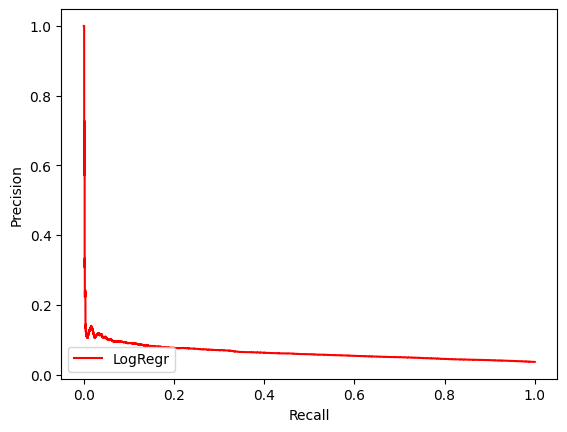

In [47]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

pr_curve = precision_recall_curve(y_test, probabilities)

PrecisionRecallDisplay(
    precision=pr_curve[0], recall=pr_curve[1], estimator_name='LogRegr').plot(c='r')

**Ответ:**
Как можно видеть, наша модель плохо работает на данной задаче, так как даже малейшее сподвижение в сторону увеличения полноты определения +1 класса, точность определения такого класса резко падает. Это означет, что наша модель крайне плохо различает объекты двух классов и они, грубо говоря, ей практически просто перемешиваются

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

In [48]:
sep_indexes = pr_curve[0] >= 0.95
precisions = pr_curve[0][sep_indexes]
recalls = pr_curve[1][sep_indexes]
seps = pr_curve[2][sep_indexes[:-1]]

In [49]:
print(f'Best possible precision: {precisions[0]}')
print(f'Best possible recall: {recalls[0]}')
print(f'Treshhold: {seps[0]}')

Best possible precision: 1.0
Best possible recall: 0.0006942837306179125
Treshhold: 0.4621174791596143


In [51]:
print(
    f'Число платежеспособных людей, что мы приняли бы: {np.sum((probabilities >= np.min(seps)) & (y_test == 1))}')

Число платежеспособных людей, что мы приняли бы: 3


Как видно, если мы обучим так модель и поставим ей порог оценивания, не пропускающий более 5% ошиблк, то людей, которым мы могли бы дать кредит окажется только 3 на всей тестовой выборке

Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился.

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной.

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. Доход, очевидно, считается только по тем людям, которым мы предполагаем что не отказали.

__(1 балл)__

In [52]:
incomes = []
for sep in pr_curve[2]:
    indexes = probabilities >= sep
    incomes.append(np.sum(indexes & (y_test == 1)) * 5000 -
                   100000 * np.sum(indexes & (y_test == 0)))

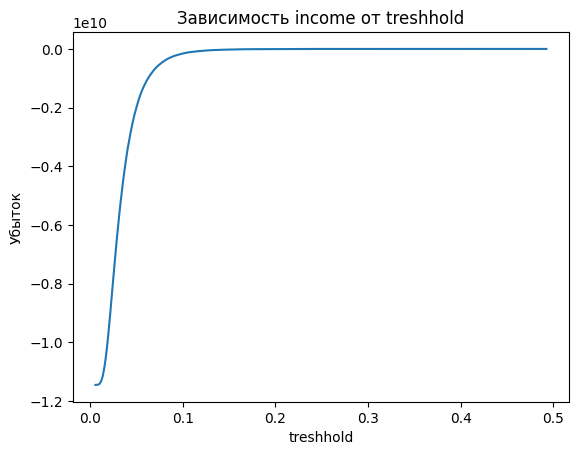

In [53]:
plt.title('Зависимость income от treshhold')
plt.xlabel('treshhold')
plt.ylabel('Убыток')
plt.plot(pr_curve[2], incomes)

In [54]:
temp = np.array(incomes)
print(
    f'первый порог, что позволяет уйти в плюс: {pr_curve[2][temp > 0][0]}, при этом заработок составялет: {temp[temp > 0][0]}')

первый порог, что позволяет уйти в плюс: 0.4621174791596143, при этом заработок составялет: 15000


А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [55]:
ind_max = np.argmax(incomes)
print(
    f'Максимальный зароботок - {incomes[ind_max]}, при threshold - {pr_curve[2][ind_max]}')

Максимальный зароботок - 15000, при threshold - 0.4621174791596143


Здесь мы занимались задачей максимизации прибыли. Однако на практике мы так же можем хотеть минимизировать альтернативные издержки

In [65]:
outcomes = []
for sep in pr_curve[2]:
    indexes = probabilities >= sep

    outcomes.append(np.sum((probabilities <= sep) & (y_test == 1)) * 5000
                    - 100000 * np.sum((probabilities <= sep) & (y_test == 0)))

In [66]:
ind_min = np.argmin(incomes)
print(
    f'Минимальные убытки - {outcomes[ind_min]}, при threshold - {pr_curve[2][ind_min]}')

Минимальные убытки - -100000, при threshold - 0.005712448810656975


То есть при таком выборе treshhold мы получим убытки в -10000, то есть получим при таком подсчете заработок

## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit.

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте.
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__

In [11]:
import pandas as pd
import numpy as np

In [5]:
!pip install -q kaggle
from google.colab import files
import pandas as pd

files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c avazu-ctr-prediction
! unzip {"avazu-ctr-prediction.zip"} -d avazu-ctr-prediction

Saving kaggle.json to kaggle.json
100% 1.18G/1.19G [00:17<00:00, 76.9MB/s]
100% 1.19G/1.19G [00:17<00:00, 72.3MB/s]
Archive:  avazu-ctr-prediction.zip
  inflating: avazu-ctr-prediction/sampleSubmission.gz  
  inflating: avazu-ctr-prediction/test.gz  
  inflating: avazu-ctr-prediction/train.gz  


In [2]:
categorical = ['site_id', 'site_domain', 'app_id', 'device_model',
               'site_domain', 'C1', 'banner_pos', 'site_id', 'site_category',
               'app_domain', 'app_category', 'device_type', 'device_conn_type',
               'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

In [1]:
! pipenv install category_encoders

Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.
Installing category_encoders...
Resolving category_encoders...
✔ Installation Succeeded
⠋ Installing category_encoders...
Pipfile.lock (17488b) out of date, updating to (a42b82)...
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success! Locking...
⠙ Locking...
Locking [dev-packages] dependencies...
Updated Pipfile.lock (5909b9c30283a0fc381d778462e938301a6071bfa98c4c00c183891fa1a42b82)!
Installing dependencies from Pipfile.lock (a42b82)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.


Скоро нам понадобится сравнивать полученные результаты с ground_true, что лежат в файлах. Напишем автоматическую функцию для этого

In [59]:
from sklearn.metrics import auc, roc_curve, precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import pandas as pd


def check_model(file_pred, file_ground, graph_name):
    df_pred = pd.read_csv(file_pred)
    df_ground = pd.read_csv(file_ground)

    auc_curve = roc_curve(
        df_ground.values[:10428967], df_pred.values[:10428967])
    pr_curve = precision_recall_curve(
        (df_ground.values[:10428967] + 1) / 2, df_pred.values[:10428967])

    fig, axis = plt.subplots(1, 2)
    fig.set_figwidth(15)
    fig.suptitle(f'Визуализация ROC и PR для {graph_name}')

    lns = np.linspace(0, 1, 10)
    axis[0].plot(lns, lns, linestyle='--', c='g')

    RocCurveDisplay(fpr=auc_curve[0], tpr=auc_curve[1], roc_auc=auc(
        auc_curve[0], auc_curve[1]), estimator_name='Linear SVM').plot(ax=axis[0])
    PrecisionRecallDisplay(
        precision=pr_curve[0], recall=pr_curve[1], estimator_name='LogRegr').plot(ax=axis[1], c='r')

### Теперь попробуем создать base_line для дальнейших действий: попробуем прогнать модель vw на нетронутых начальных данных

заметим, что есть смысл лишь избавиться от 'id', 'device_ip', 'device_id'

In [170]:
def to_vw(file_in_name, file_out_name, count):
    out = open(file_out_name, 'w')
    df_iter = pd.read_csv(file_in_name, sep=',', chunksize=1_000_000)
    i = 0
    for df in df_iter:
        i += 1
        partial = ''

        target = df['click']
        df = df.drop(columns=['id', 'click', 'device_ip', 'device_id'])

        for trg, line in zip(target.values, df.iterrows()):
            zipper = zip(line[1].index, line[1].values)
            st = ' '.join(map(lambda x: '' if pd.isna(
                x[1]) else f'{x[0]}:{x[1]}', zipper))
            partial += str(trg) + ' | ' + st + '\n'

        print(partial, file=out)
        if i >= count:
            break
    out.close()

In [171]:
to_vw('./avazu-ctr-prediction/train.csv',
      './avazu-ctr-prediction/train_wv_base.txt', 30)

In [172]:
def to_vw_test(file_in_name, file_out_name, file_out_target_name, from_ind):
    out = open(file_out_name, 'w')
    out_target = open(file_out_target_name, 'w')
    df_iter = pd.read_csv(file_in_name, sep=',', names=indexes,
                          chunksize=1_000_000, skiprows=from_ind)
    for df in df_iter:
        partial = ''
        target = df['click']
        df = df.drop(columns=['id', 'click', 'device_ip', 'device_id'])

        for trg, line in zip(target.values, df.iterrows()):
            zipper = zip(line[1].index, line[1].values)
            st = ' '.join(map(lambda x: '' if pd.isna(
                x[1]) else f'{x[0]}:{x[1]}', zipper))
            partial += str(trg) + ' | ' + st + '\n'
            print(trg, file=out_target)

        print(partial, file=out)
    out.close()

In [173]:
to_vw_test('./avazu-ctr-prediction/train.csv',
           './avazu-ctr-prediction/test_wv_base.txt',
           './avazu-ctr-prediction/test_target_base.txt', 30_000_000)

In [ ]:
! vw -d ./HW3/avazu-ctr-prediction/test_wv_base.txt -f ./HW3/model_base_line.model

Можно видеть постоянные WARNINGS от vw о том, что категориальные признаки, закодированные с помощью букв и чисел, не воспринимаются правильно самим vw. 
Посмотрим на качесвто итогового классификатора

In [ ]:
! vw -i ./HW3/model_base_line.model -t ./HW3/avazu-ctr-prediction/test_wv_base.txt -p ./HW3/predictions_base_line.txt

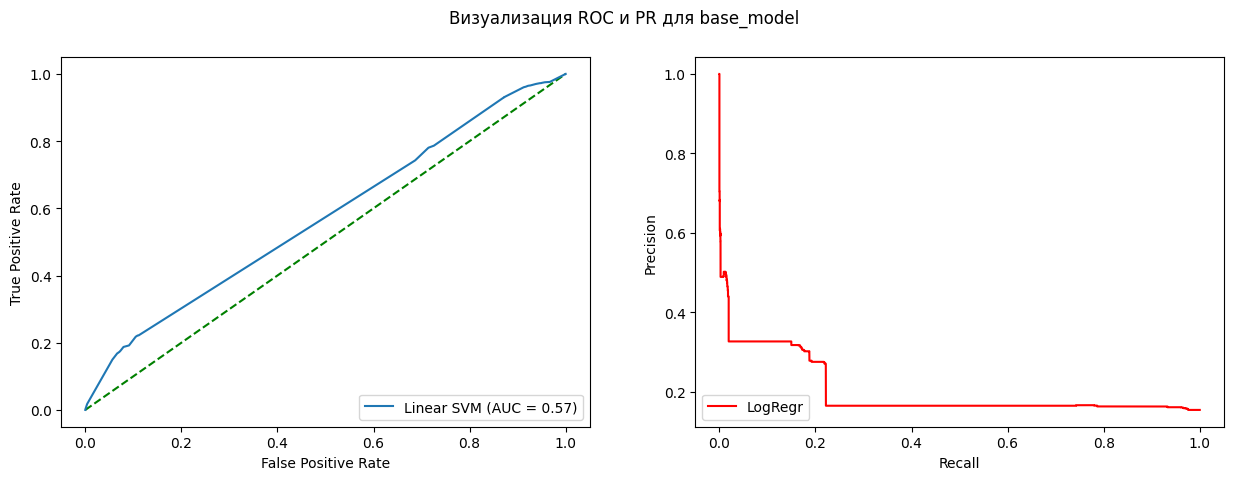

In [25]:
check_model('./predictions_base_line.txt',
            './avazu-ctr-prediction/test_target_base.txt', 'base_model')

### Теперь попробуем просто применить счетчики, чтобы улучшить качество модели

Мы имеем следующие важные замечания к датасету:
1.  Нам не важен id (первая колонка) а так же device_ip
2.  Таргетом выступает класс 0 либо 1 (вторая колонка)
3.  Все что указано в массиве categorical является категорическими признаками, все остальное -- нет

Переведем наш датасет батчами. 

При чем понятное дело, что если мы посмотрим, например datawranglerom, на исходные данные, то заметим, что категориальных признаков зашкаливающее количесвто. Поэтому воспользуемся библиотекой счетчиков category_encoders. Закодируем все категориальные значение средним по таргет-переменной, что не иметь проклятие большой размерности. 

Библиотека category_encoders удобна тем, что она быстра, однако в ней нет возможности дообучать энкодер, из-за чего мы наш датасет, который собственно не можем держать весь в памяти, постоянно забываем. Это плохо, а потому я делаю следующим образом: 

*   Разобьем на батчи по 1000000 объектов выборку и будем обрабатывать каждый из них
*   По каждому батчу для каждой категории в нем ищем среднее по таргету
*   Последжовательно находим среднее между запомниными значениями для каждой категории и новыми, для батча
*   Конечный результат получается усреднением раз за разом средней от всех 30 батчей

In [31]:
from category_encoders.target_encoder import TargetEncoder
from collections import defaultdict
import dill

encoder = TargetEncoder(cols=categorical, return_df=True,
                        handle_missing=None, handle_unknown=None)

est_list = defaultdict(lambda: pd.Series())
dill.dump(est_list, open('./estimator_dump.db', 'wb'))


def csv_train_to_vowpal(file_in_name, file_out_name, count):
    out = open(file_out_name, 'w')
    df_iter = pd.read_csv(file_in_name, sep=',', chunksize=1_000_000)
    i = 0
    for df in df_iter:
        i += 1
        partial = ''

        target = df['click'] * 2 - 1
        df = df.drop(columns=['id', 'click', 'device_ip', 'device_id'])
        df = encoder.fit_transform(df, target, cols=categorical)

        for trg, line in zip(target.values, df.iterrows()):
            zipper = zip(line[1].index, line[1].values)
            st = ' '.join(map(lambda x: '' if pd.isna(
                x[1]) else f'{x[0]}:{x[1]}', zipper))
            partial += str(trg) + ' | ' + st + '\n'

        print(partial, file=out)

        est_list = dill.load(open('./estimator_dump.db', 'rb'))
        for attr, ser in encoder.__dict__['mapping'].items():
            est_list[attr] = est_list[attr].add(ser, fill_value=0). \
                sub(est_list[attr].add(ser, fill_value=0) -
                    (est_list[attr] + ser) / 2, fill_value=0)
        dill.dump(est_list, open('./estimator_dump.db', 'wb'))

        if i >= count:
            break
    out.close()

In [32]:
csv_train_to_vowpal('./avazu-ctr-prediction/train.csv',
                    './avazu-ctr-prediction/train_wv_svm.txt', 30)

Здесь нам просто необходимо сделать хакерский прикол, ибо иначе пришлось бы руками прогать, а мы такого не любим

In [33]:
est_list = dill.load(open('./estimator_dump.db', 'rb'))
indexes = next(iter(pd.read_csv(
    './avazu-ctr-prediction/train.csv', sep=',', chunksize=2))).columns
dis_encoder = TargetEncoder(cols=categorical, return_df=True,
                            handle_missing=None, handle_unknown=None)

# hacktime
temp = next(
    iter(pd.read_csv('./avazu-ctr-prediction/train.csv', sep=',', chunksize=2)))
dis_encoder.fit(temp.drop(columns=[
                'id', 'click', 'device_ip', 'device_id']), temp['click'], cols=categorical)
dis_encoder.__dict__['mapping'] = est_list

In [34]:
def csv_test_to_vowpal(file_in_name, file_out_name, file_out_target_name, ind_from):
    out = open(file_out_name, 'w')
    out_target = open(file_out_target_name, 'w')
    df_iter = pd.read_csv(file_in_name, sep=',', names=indexes,
                          chunksize=1_000_000, skiprows=ind_from)
    for df in df_iter:
        partial = ''
        target = df['click'] * 2 - 1
        df = df.drop(columns=['id', 'click', 'device_ip', 'device_id'])
        df = dis_encoder.transform(df)

        for trg, line in zip(target.values, df.iterrows()):
            zipper = zip(line[1].index, line[1].values)
            st = ' '.join(map(lambda x: '' if pd.isna(
                x[1]) else f'{x[0]}:{x[1]}', zipper))
            partial += '| ' + st + '\n'
            print(trg, file=out_target)

        print(partial, file=out)
    out.close()

In [35]:
csv_test_to_vowpal('./avazu-ctr-prediction/train.csv',
                   './avazu-ctr-prediction/test_wv_svm.txt',
                   './avazu-ctr-prediction/test_target_svm.txt', 30_000_000)

In [ ]:
! vw -d ./HW3/avazu-ctr-prediction/train_wv.txt -f ./HW3/model_counter.model     

Обучение стало в разы дольше. Теперь посмотрим на результаты

In [ ]:
! vw -i ./HW3/model_counter.model -t ./HW3/avazu-ctr-prediction/test_wv.txt -p ./HW3/predictions_counter.txt    

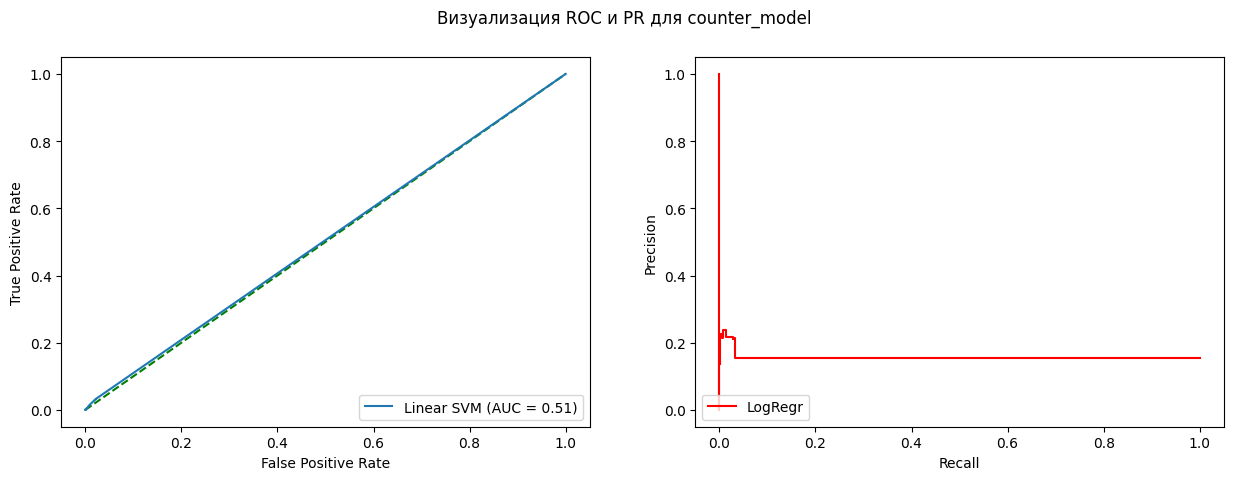

In [214]:
check_model('./predictions_counter.txt',
            './avazu-ctr-prediction/test_target.txt', 'counter_model')

Модель сразу же потеряла в качестве, причем существенно. Сразу упала полнота определенеия положительного класса, точность упала в разы. Теперь, чтобы хоть как-то уметь определеять положительный класс, нам приходится серьезно жертвовать качесвтом

### Почему это так и что же с этим делать?!

Если посмотреть на данные, то можно увидеть, что чем дальше мы идем от начала файла, тем больше пропусков в замерах мы имеем. Вполне возможно именно это сделало модель такой поломанной. При чем в конце выборки могли быть категории, что ранее не встречались. Следовательно замешаем наш файл.

In [20]:
from category_encoders.target_encoder import TargetEncoder
from collections import defaultdict
import dill

encoder = TargetEncoder(cols=categorical, return_df=True,
                        handle_missing=None, handle_unknown=None)

est_list = defaultdict(lambda: pd.Series())
dill.dump(est_list, open('./estimator_dump.db', 'wb'))

np.random.seed(666)
indexes = np.arange(0, 40)
np.random.shuffle(indexes)
to_extract = indexes[:10]


def advanced_to_vw(file_in_name, file_out_name, file_out_name_test, file_out_name_target):
    out = open(file_out_name, 'w')
    out_test = open(file_out_name_test, 'w')
    out_target = open(file_out_name_target, 'w')

    df_iter = pd.read_csv(file_in_name, sep=',', chunksize=1_000_000)
    i = 0
    for df in df_iter:
        if i in to_extract:
            i += 1
            continue
        i += 1
        partial_train = ''

        target = df['click']
        df = df.drop(columns=['id', 'click', 'device_ip', 'device_id'])
        df = encoder.fit_transform(df, target, cols=categorical)

        for trg, line in zip(target.values, df.iterrows()):
            zipper = zip(line[1].index, line[1].values)
            st = ' '.join(map(lambda x: '' if pd.isna(
                x[1]) else f'{x[0]}:{x[1]}', zipper))
            partial_train += str(trg) + ' | ' + st + '\n'

        print(partial_train, file=out)

        est_list = dill.load(open('./estimator_dump.db', 'rb'))
        for attr, ser in encoder.__dict__['mapping'].items():
            est_list[attr] = est_list[attr].add(ser, fill_value=0). \
                sub(est_list[attr].add(ser, fill_value=0) -
                    (est_list[attr] + ser) / 2, fill_value=0)
        dill.dump(est_list, open('./estimator_dump.db', 'wb'))

    df_iter = pd.read_csv(file_in_name, sep=',', chunksize=1_000_000)

    est_list = dill.load(open('./estimator_dump.db', 'rb'))
    dis_encoder = TargetEncoder(cols=categorical, return_df=True,
                                handle_missing=None, handle_unknown=None)

    # hacktime
    temp = next(
        iter(pd.read_csv('./avazu-ctr-prediction/train.csv', sep=',', chunksize=2)))
    dis_encoder.fit(temp.drop(columns=[
                    'id', 'click', 'device_ip', 'device_id']), temp['click'], cols=categorical)
    dis_encoder.__dict__['mapping'] = est_list

    df_iter = pd.read_csv(file_in_name, sep=',', chunksize=1_000_000)
    i = 0
    for df in df_iter:
        if i not in to_extract:
            i += 1
            continue
        i += 1

        partial_train = ''

        target = df['click']
        df = df.drop(columns=['id', 'click', 'device_ip', 'device_id'])
        df = encoder.fit_transform(df, target, cols=categorical)

        for trg, line in zip(target.values, df.iterrows()):
            zipper = zip(line[1].index, line[1].values)
            st = ' '.join(map(lambda x: '' if pd.isna(
                x[1]) else f'{x[0]}:{x[1]}', zipper))
            partial_train += str(trg) + ' | ' + st + '\n'
            print(trg, file=out_target)

        print(partial_train, file=out_test)

    out.close()
    out_target.close()

In [21]:
advanced_to_vw('./avazu-ctr-prediction/train.csv',
               './avazu-ctr-prediction/advanced_train_wv.txt',
               './avazu-ctr-prediction/advanced_test_wv.txt',
               './avazu-ctr-prediction/advanced_target.txt')

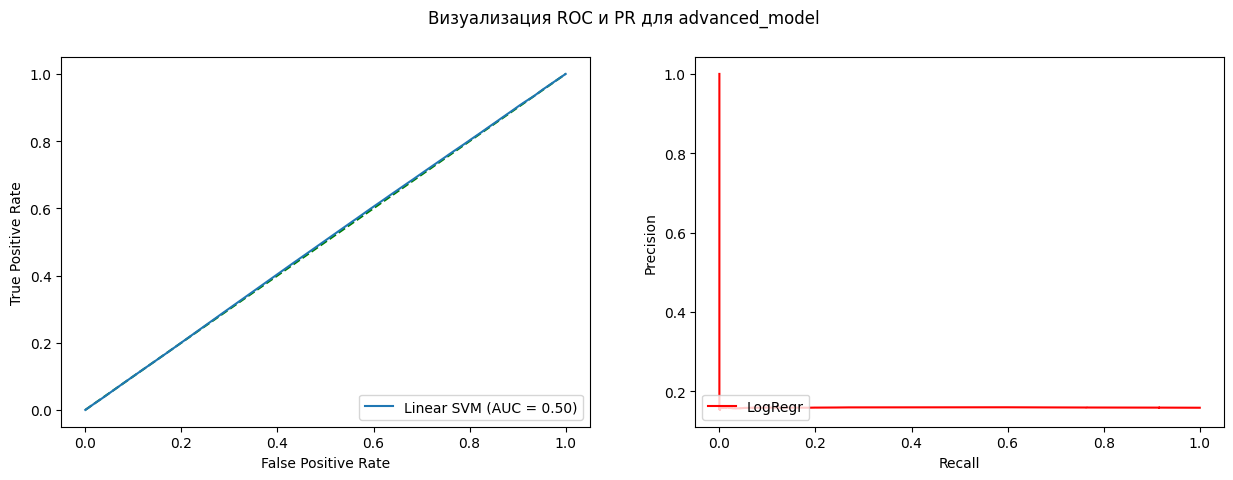

In [19]:
check_model('./predictions_advanced.txt',
            './avazu-ctr-prediction/advanced_target.txt', 'advanced_model')

В итоге получили, что бездумное использование счетчиков вообще никак не решает проблему качества алгоритма, а скорее только ее ухудшает. Придется прибегать к другим методам. Результаты какой-то лютый кринж. Короче, мы больше этими счетчиками не промышляем

### Попробуем теперь различные модели, ну просто потому что можем

In [ ]:
! vw -d ./HW3/avazu-ctr-prediction/train_wv.txt -f ./HW3/model_smth.model --boosting 5  --alg logistic
! vw -i ./HW3/model_smth.model -t ./HW3/avazu-ctr-prediction/test_wv.txt -p ./HW3/predictions_boosting.txt

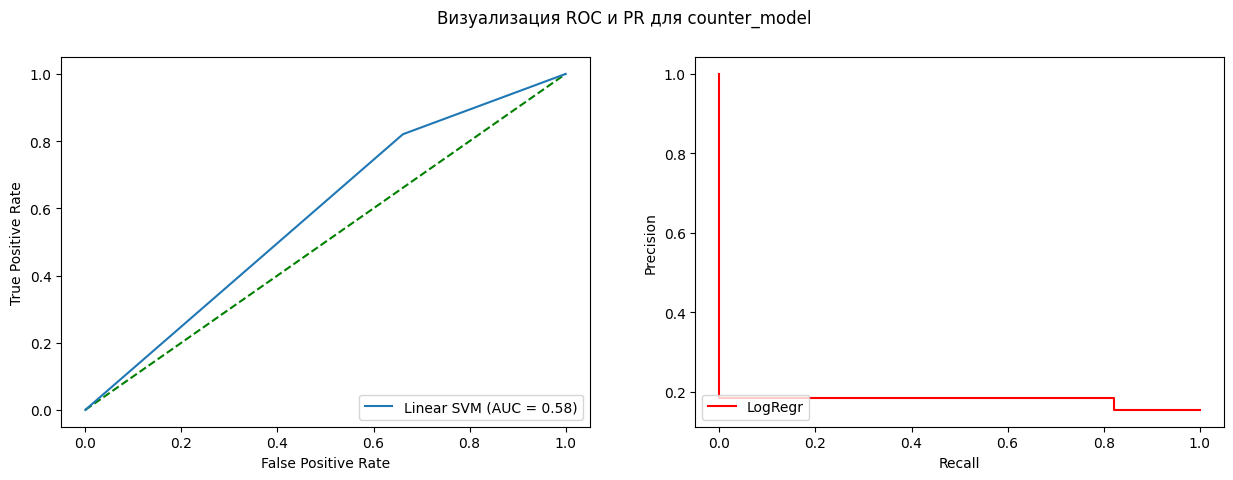

In [30]:
check_model('./predictions_boosting.txt',
            './avazu-ctr-prediction/test_target.txt', 'counter_model')

In [ ]:
! vw -d ./HW3/avazu-ctr-prediction/train_wv_svm.txt -f ./HW3/model_svm.model --ksvm --kernel rbf --bandwidth 1.5

# решения не будет(( он так и не досчитал за полтора дня!

### Самый крутой подход

Попробуем теперь самый крутой подход. Положимся на внутренние средства vw и закодируем признаки как категориальными и разделем из на namespaces.

Еще раз посмотрим на все признаки датасета

In [68]:
df_iter_test = pd.read_csv(
    './avazu-ctr-prediction/train.csv', sep=',', chunksize=1_000_000)

In [72]:
next(df_iter_test).dtypes

id                  float64
click                 int64
hour                  int64
C1                    int64
banner_pos            int64
site_id              object
site_domain          object
site_category        object
app_id               object
app_domain           object
app_category         object
device_id            object
device_ip            object
device_model         object
device_type           int64
device_conn_type      int64
C14                   int64
C15                   int64
C16                   int64
C17                   int64
C18                   int64
C19                   int64
C20                   int64
C21                   int64
dtype: object

Тогда разделим на следующие namespaces, вычеркнув `device_ip` и `id`:

*   `C1`, `C14`, `C15`, `C16`, `C17`, `C18`, `C19`, `C20`, `C21` - channels
*   `device_id`, `device_model`, `device_type`, `device_conn_type` - devices
*   `app_id`, `app_domain`, `app_category` - apps
*   `hour`, `banner_pos` - meta
*   `site_id`, `site_domain`, `site_category` - sites

In [34]:
channels = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
devices = ['device_id', 'device_model', 'device_type', 'device_conn_type']
apps = ['app_id', 'app_domain', 'app_category']
meta = ['hour', 'banner_pos']
sites = ['site_id', 'site_domain', 'site_category']

In [37]:
indexes = next(iter(pd.read_csv(
    './avazu-ctr-prediction/train.csv', sep=',', chunksize=2))).columns

In [122]:
df_iter = pd.read_csv('./avazu-ctr-prediction/train.csv',
                      sep=',', skiprows=10, chunksize=1_0)

In [32]:
def to_vw_for_nn(file_in_name, file_out_name, count, target_out='', test=False):
    out = open(file_out_name, 'w')
    if test:
        df_iter = pd.read_csv(
            file_in_name, sep=',', skiprows=count, names=indexes, chunksize=1_000_000)
        out_target = open(target_out, 'w')
    else:
        df_iter = pd.read_csv(file_in_name, sep=',', chunksize=1_000_000)
    i = 0
    for df in df_iter:
        i += 1
        partial = ''
        partial_target = ''

        target = df['click'] * 2 - 1
        df = df.drop(columns=['id', 'click', 'device_ip'])

        for trg, (_, line) in zip(target.values, df.iterrows()):
            partial_target += f'{str(trg)}\n'
            temp = '|channels '
            for fet in channels:
                if fet in line.index:
                    temp += f'{fet}={line[fet]} '

            temp += '|devices '
            for fet in devices:
                if fet in line.index:
                    temp += f'{fet}={line[fet]} '

            temp += '|apps '
            for fet in apps:
                if fet in line.index:
                    temp += f'{fet}={line[fet]} '

            temp += '|meta '
            for fet in meta:
                if fet in line.index:
                    temp += f'{fet}={line[fet]} '

            temp += '|sites '
            for fet in sites:
                if fet in line.index:
                    temp += f'{fet}={line[fet]} '

            partial += str(trg) + ' ' + temp + '\n'

        print(partial, file=out)
        if test:
            print(partial_target, file=out_target, end='')
        if i >= count:
            break
    out.close()

In [35]:
to_vw_for_nn('./avazu-ctr-prediction/train.csv',
             './avazu-ctr-prediction/train_nn_with_all_categories_sigmoid.txt', 30)

In [38]:
to_vw_for_nn('./avazu-ctr-prediction/train.csv',
             './avazu-ctr-prediction/test_nn_with_all_categories_sigmoid.txt',
             target_out='./avazu-ctr-prediction/nn_all_categories_target_sigmoid.txt', count=30_000_000, test=True)

In [ ]:
!vw -d ./HW3/avazu-ctr-prediction/train_nn_with_all_categories.txt -f ./HW3/nn_model.model --nn  --inpass --dropout  --multitask -q :: --normal_weights
!vw -i ./HW3/nn_model.model -t ./HW3/avazu-ctr-prediction/test_nn_with_all_categories.txt -p ./HW3/nn_predictions.txt

!vw -d ./HW3/avazu-ctr-prediction/train_nn_with_all_categories_sigmoid.txt -f ./HW3/nn_model_400_sigmoid.model --nn 400 --inpass --multitask -q :: --normal_weights --dropout
!vw -i ./HW3/nn_model_400_sigmoid.model -t ./HW3/avazu-ctr-prediction/test_nn_with_all_categories.txt -p ./nn_400_sigmoidal_predictions.txt

!vw -d ./HW3/avazu-ctr-prediction/train_nn_with_all_categories_sigmoid.txt -f ./HW3/nn_model_150_weights_sigmoid.model --nn 150 --inpass --multitask --cubic das -q cc --normal_weights --dropout
!vw -i ./HW3/nn_model_150_weights_sigmoid.model -t ./HW3/avazu-ctr-prediction/test_nn_with_all_categories_sigmoid.txt -p nn_150_sigmoid_predictions.txt

!vw -d ./HW3/avazu-ctr-prediction/train_nn_with_all_categories_sigmoid.txt -f ./HW3/nn_model_100_weights_sigmoid.model --nn 100 --inpass --multitask -q ::
!vw -i ./HW3/nn_model_100_weights_sigmoid.model -t ./HW3/avazu-ctr-prediction/test_nn_with_all_categories_sigmoid.txt -p last_preds.txt

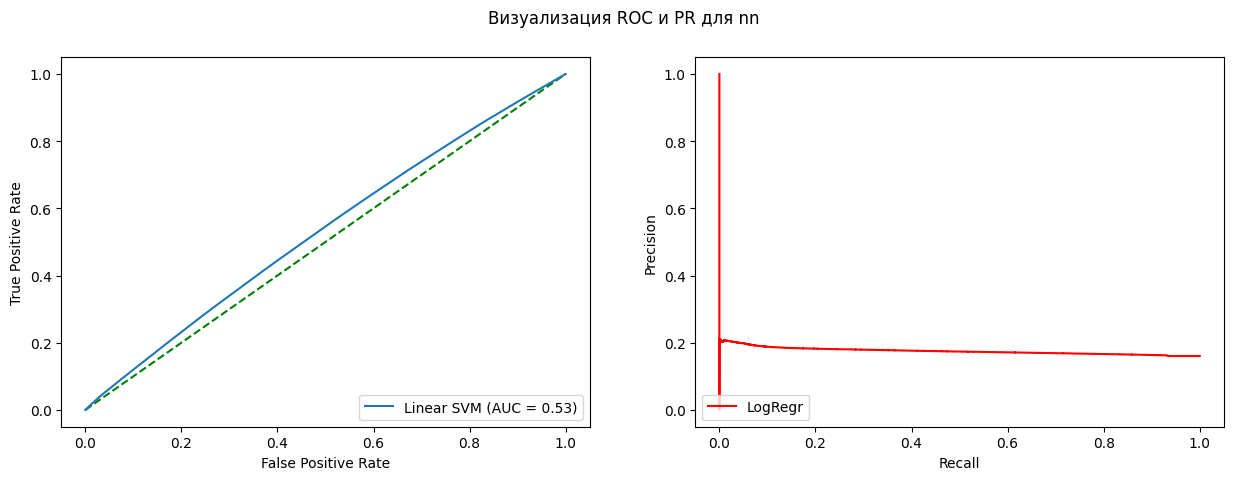

In [68]:
check_model('./last_preds.txt',
            './avazu-ctr-prediction/nn_all_categories_target_sigmoid.txt', 'nn')